In [1]:
import os
os.chdir("..")

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from load.helpers import parse_yaml
from graph.plot_helpers import load_simulation_for_all_sectors, calculate_effect_from_other_sectors, sort_dictionary_by_mean_of_list, calculate_effect_on_other_sectors
from graph.plotting import plot_asset_value_dist, plot_defaults, plot_cummulative_defaults, plot_effect_on_sectors_from_other_sectors, plot_pairwise_effect

config_dict = parse_yaml("config.yaml")

## Sector level analysis

## 1st Model
parameters:
- distribution: pareto
- alpha: 0.7
- scale parameter: 0.1
- default threshold: 0.5 (if a firm loses all of their equity, they default)
- number of simulations: 100

In [2]:
sectors_dict = load_simulation_for_all_sectors(config_dict["outputs"]["simulations"], "2022_11_01_122237", config_dict["lists"]["sectors"])

In [7]:
result_dict = calculate_effect_from_other_sectors(sectors_dict, include_self=True)

In [8]:
m = np.zeros((10,10))
for i, s in enumerate(config_dict["lists"]["sectors"]):
    for j, se in enumerate(config_dict["lists"]["sectors"]):
        m[i,j] = np.mean(result_dict[s][se])

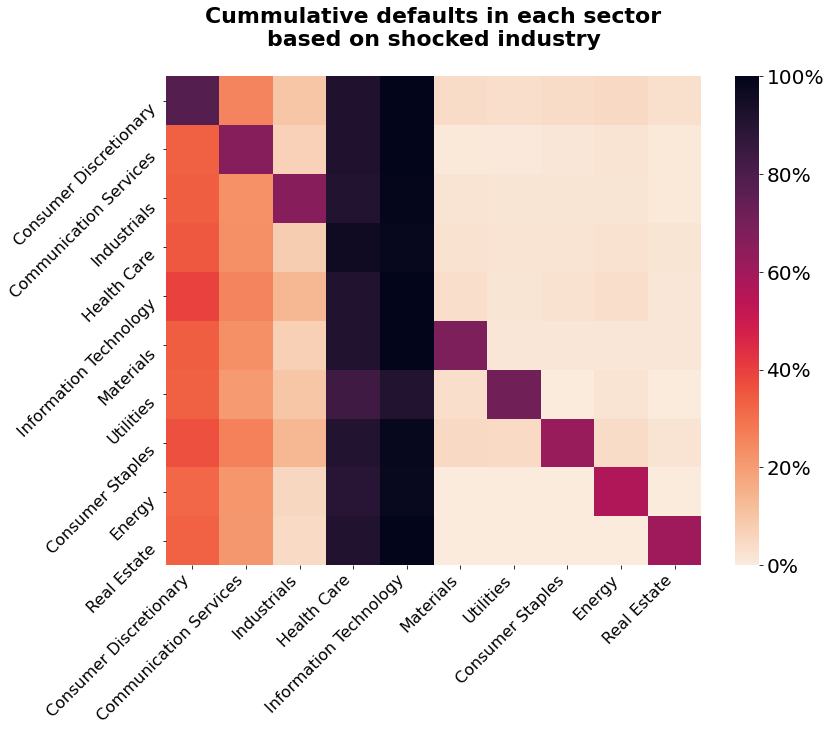

In [18]:

import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(12, 9))

cmap = sns.cm.rocket_r
sns.heatmap(m, ax=ax, cmap=cmap)
ax.set_xticklabels(config_dict["lists"]["sectors"], rotation=45, ha='right', fontsize=16)
ax.set_title(
    "Cummulative defaults in each sector\nbased on shocked industry",
    size=22,
    pad=30,
    fontweight="bold",
)
ax.set_yticklabels(config_dict["lists"]["sectors"], fontsize=16, rotation=45, va='top')
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=20)
cax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

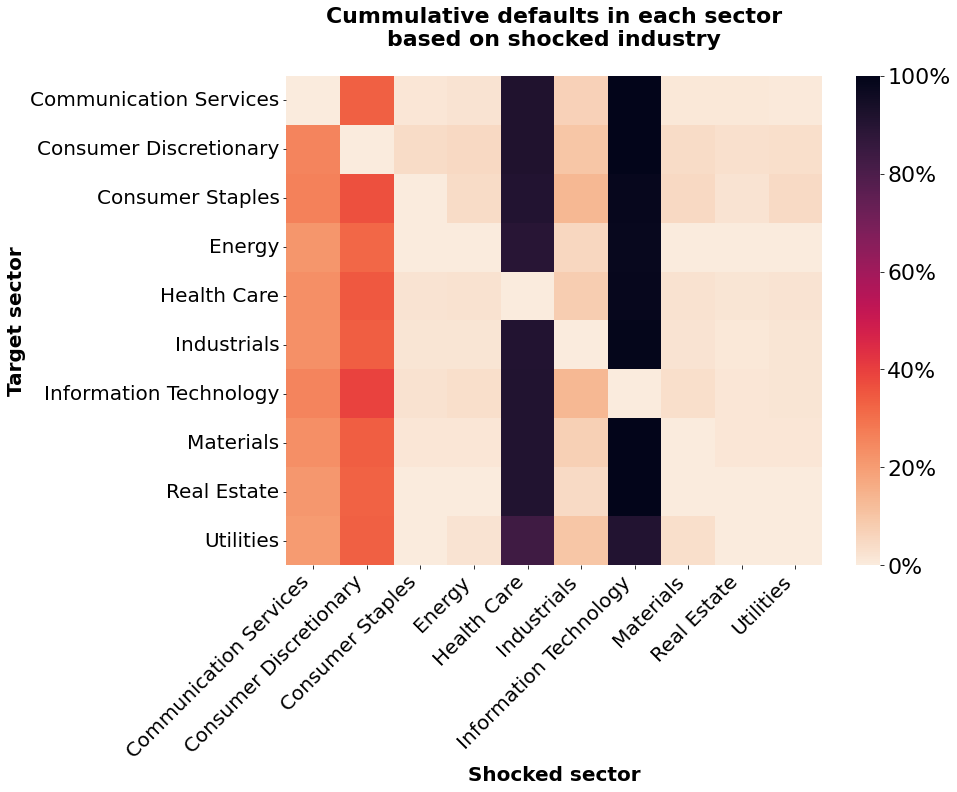

In [3]:
fig = plot_pairwise_effect(sectors_dict, include_self=False)

In [4]:
fig.savefig(f"{config_dict['outputs']['plots']}heatmap_demo.png", bbox_inches='tight',dpi=600)

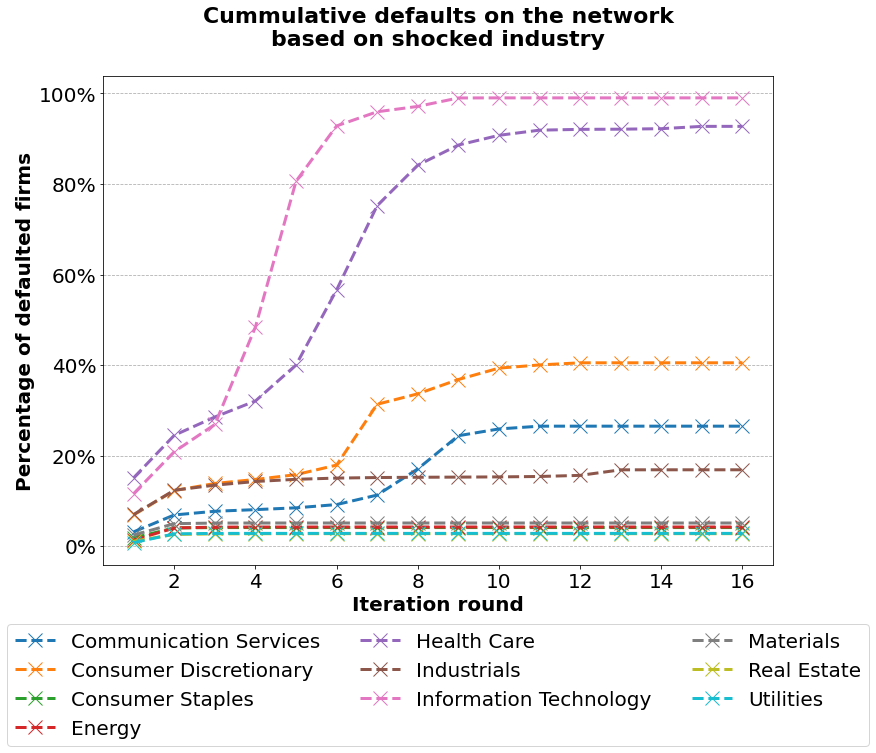

In [3]:
fig = plot_cummulative_defaults(sectors_dict)

In [4]:
fig.savefig(f"{config_dict['outputs']['plots']}cummdef_demo.png", bbox_inches='tight',dpi=600)

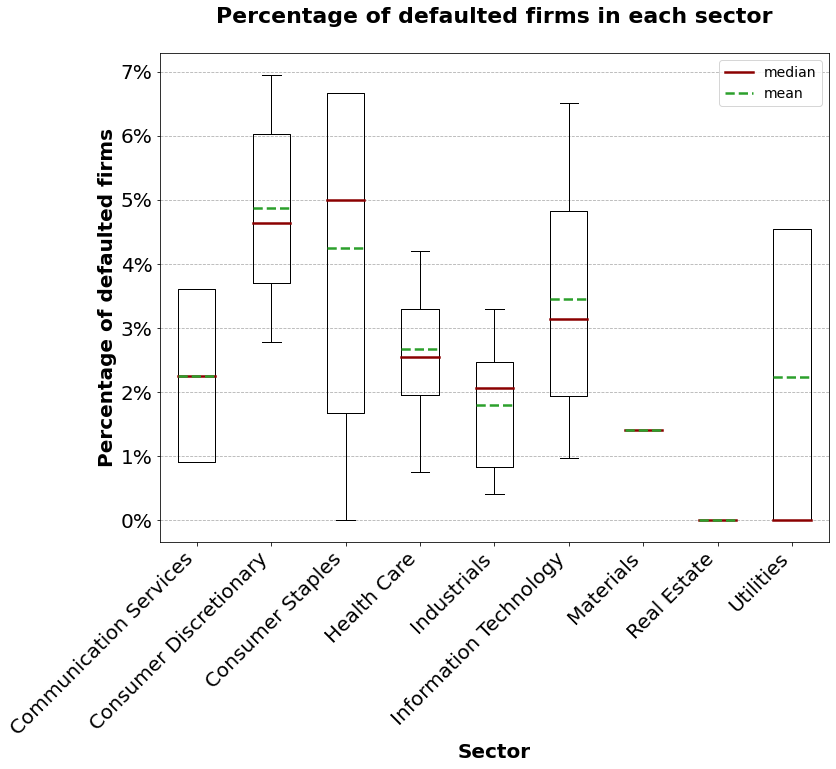

In [3]:
fig = plot_defaults(sectors_dict, "Energy", 'sectors_total')

In [4]:
fig.savefig(f"{config_dict['outputs']['plots']}boxplot_demo.png", bbox_inches='tight',dpi=600)

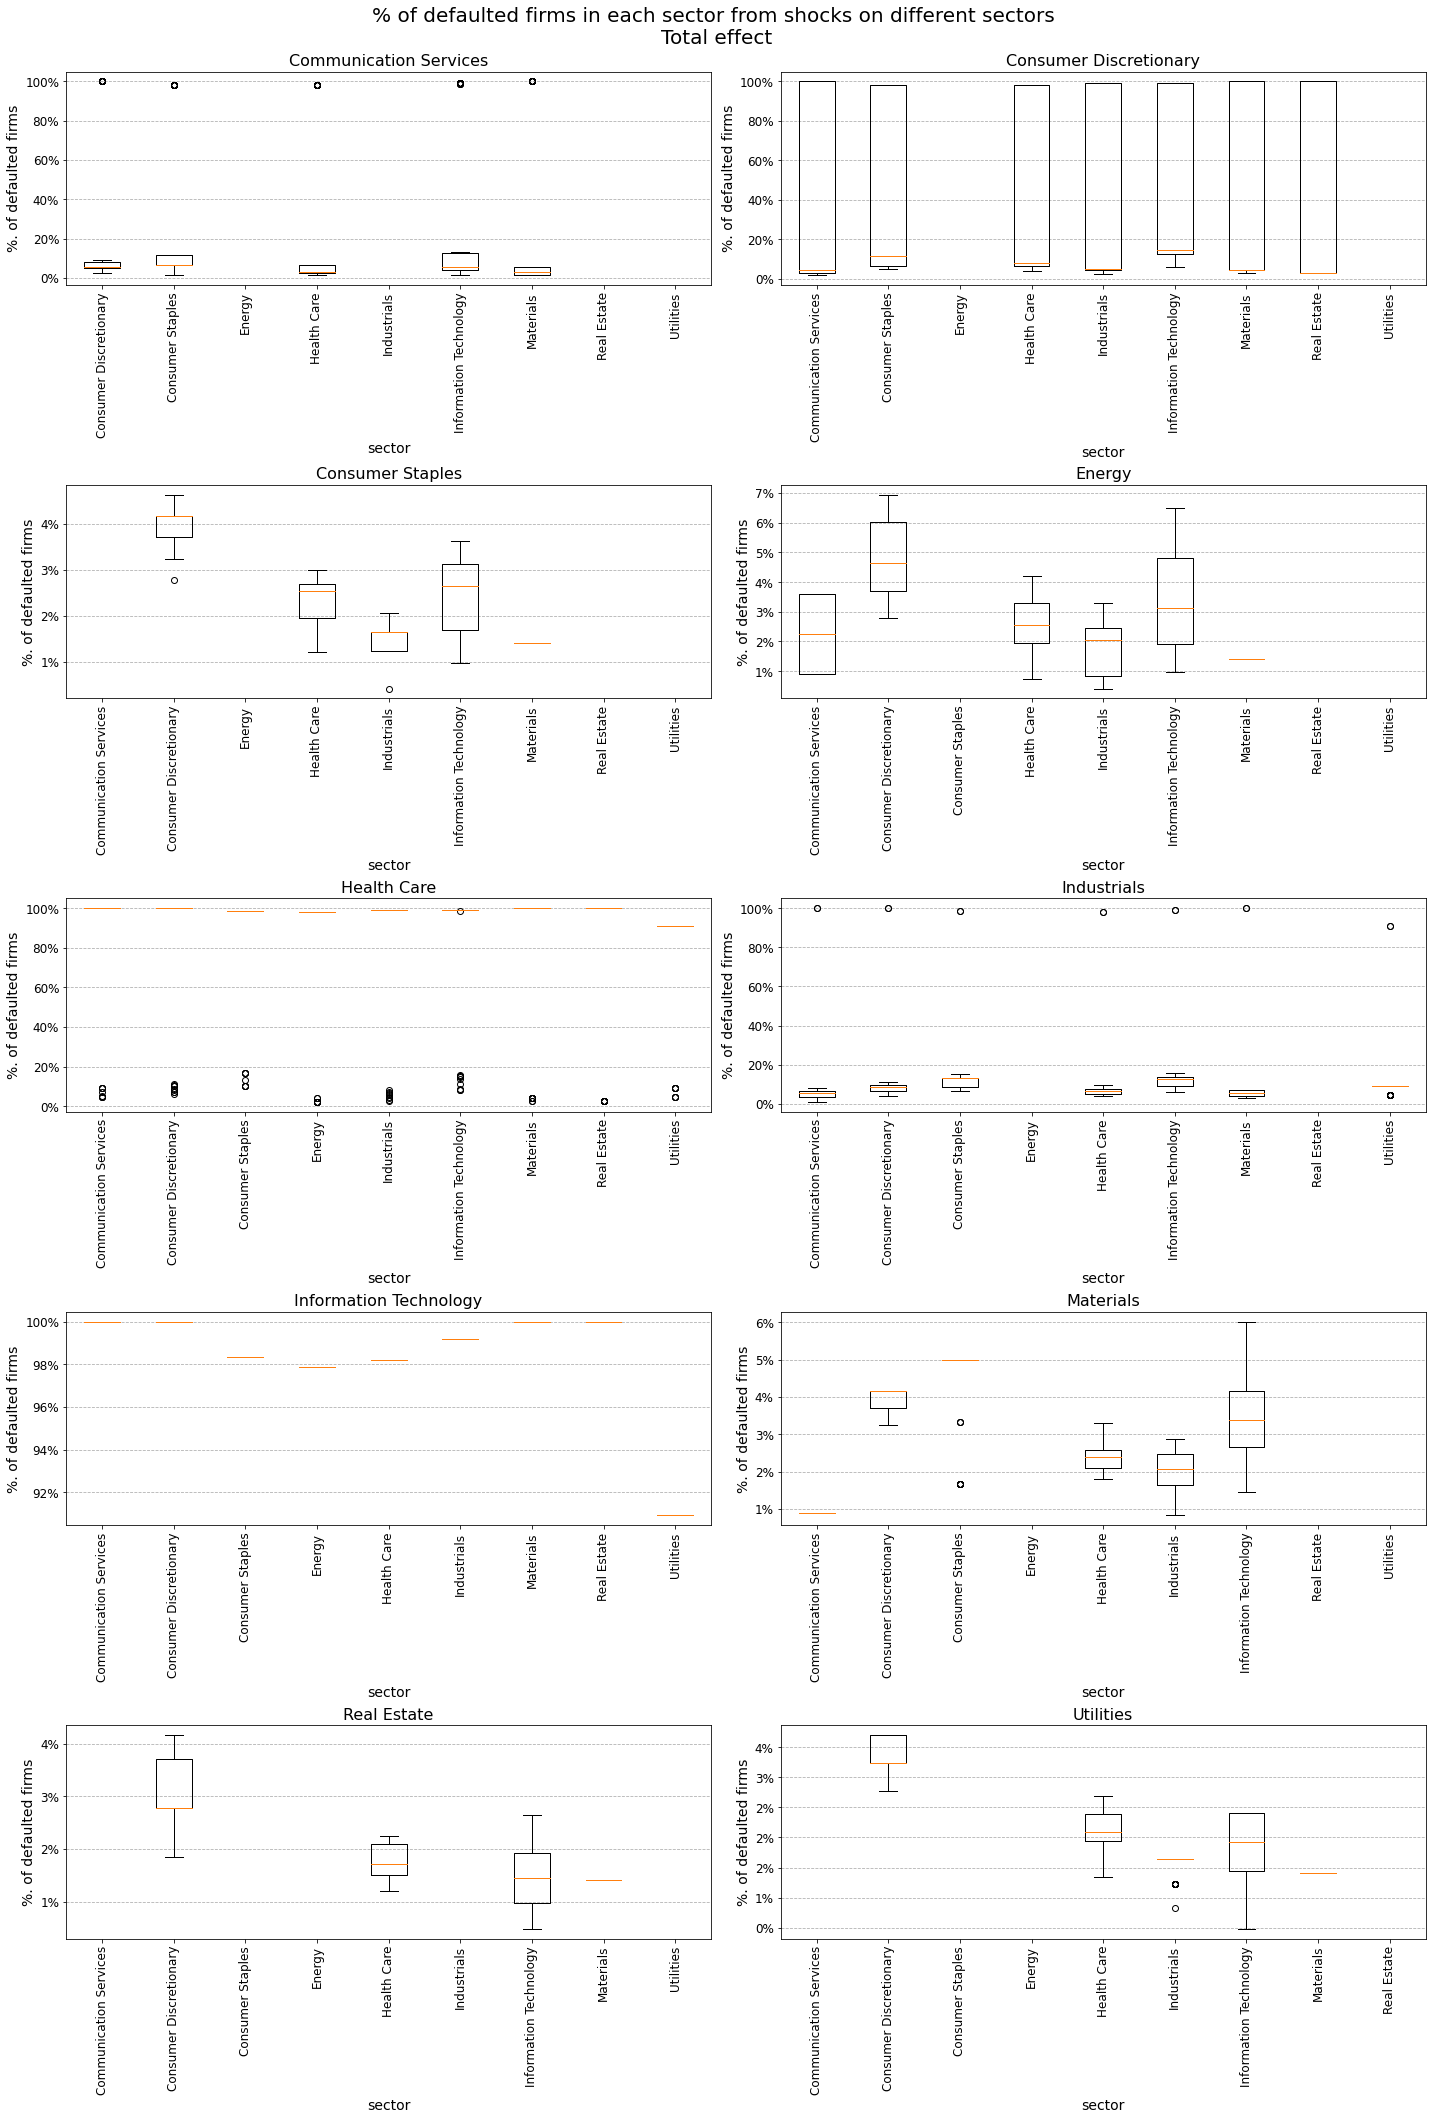

In [5]:
fig = plot_defaults(sectors_dict, "all", 'sectors_total')

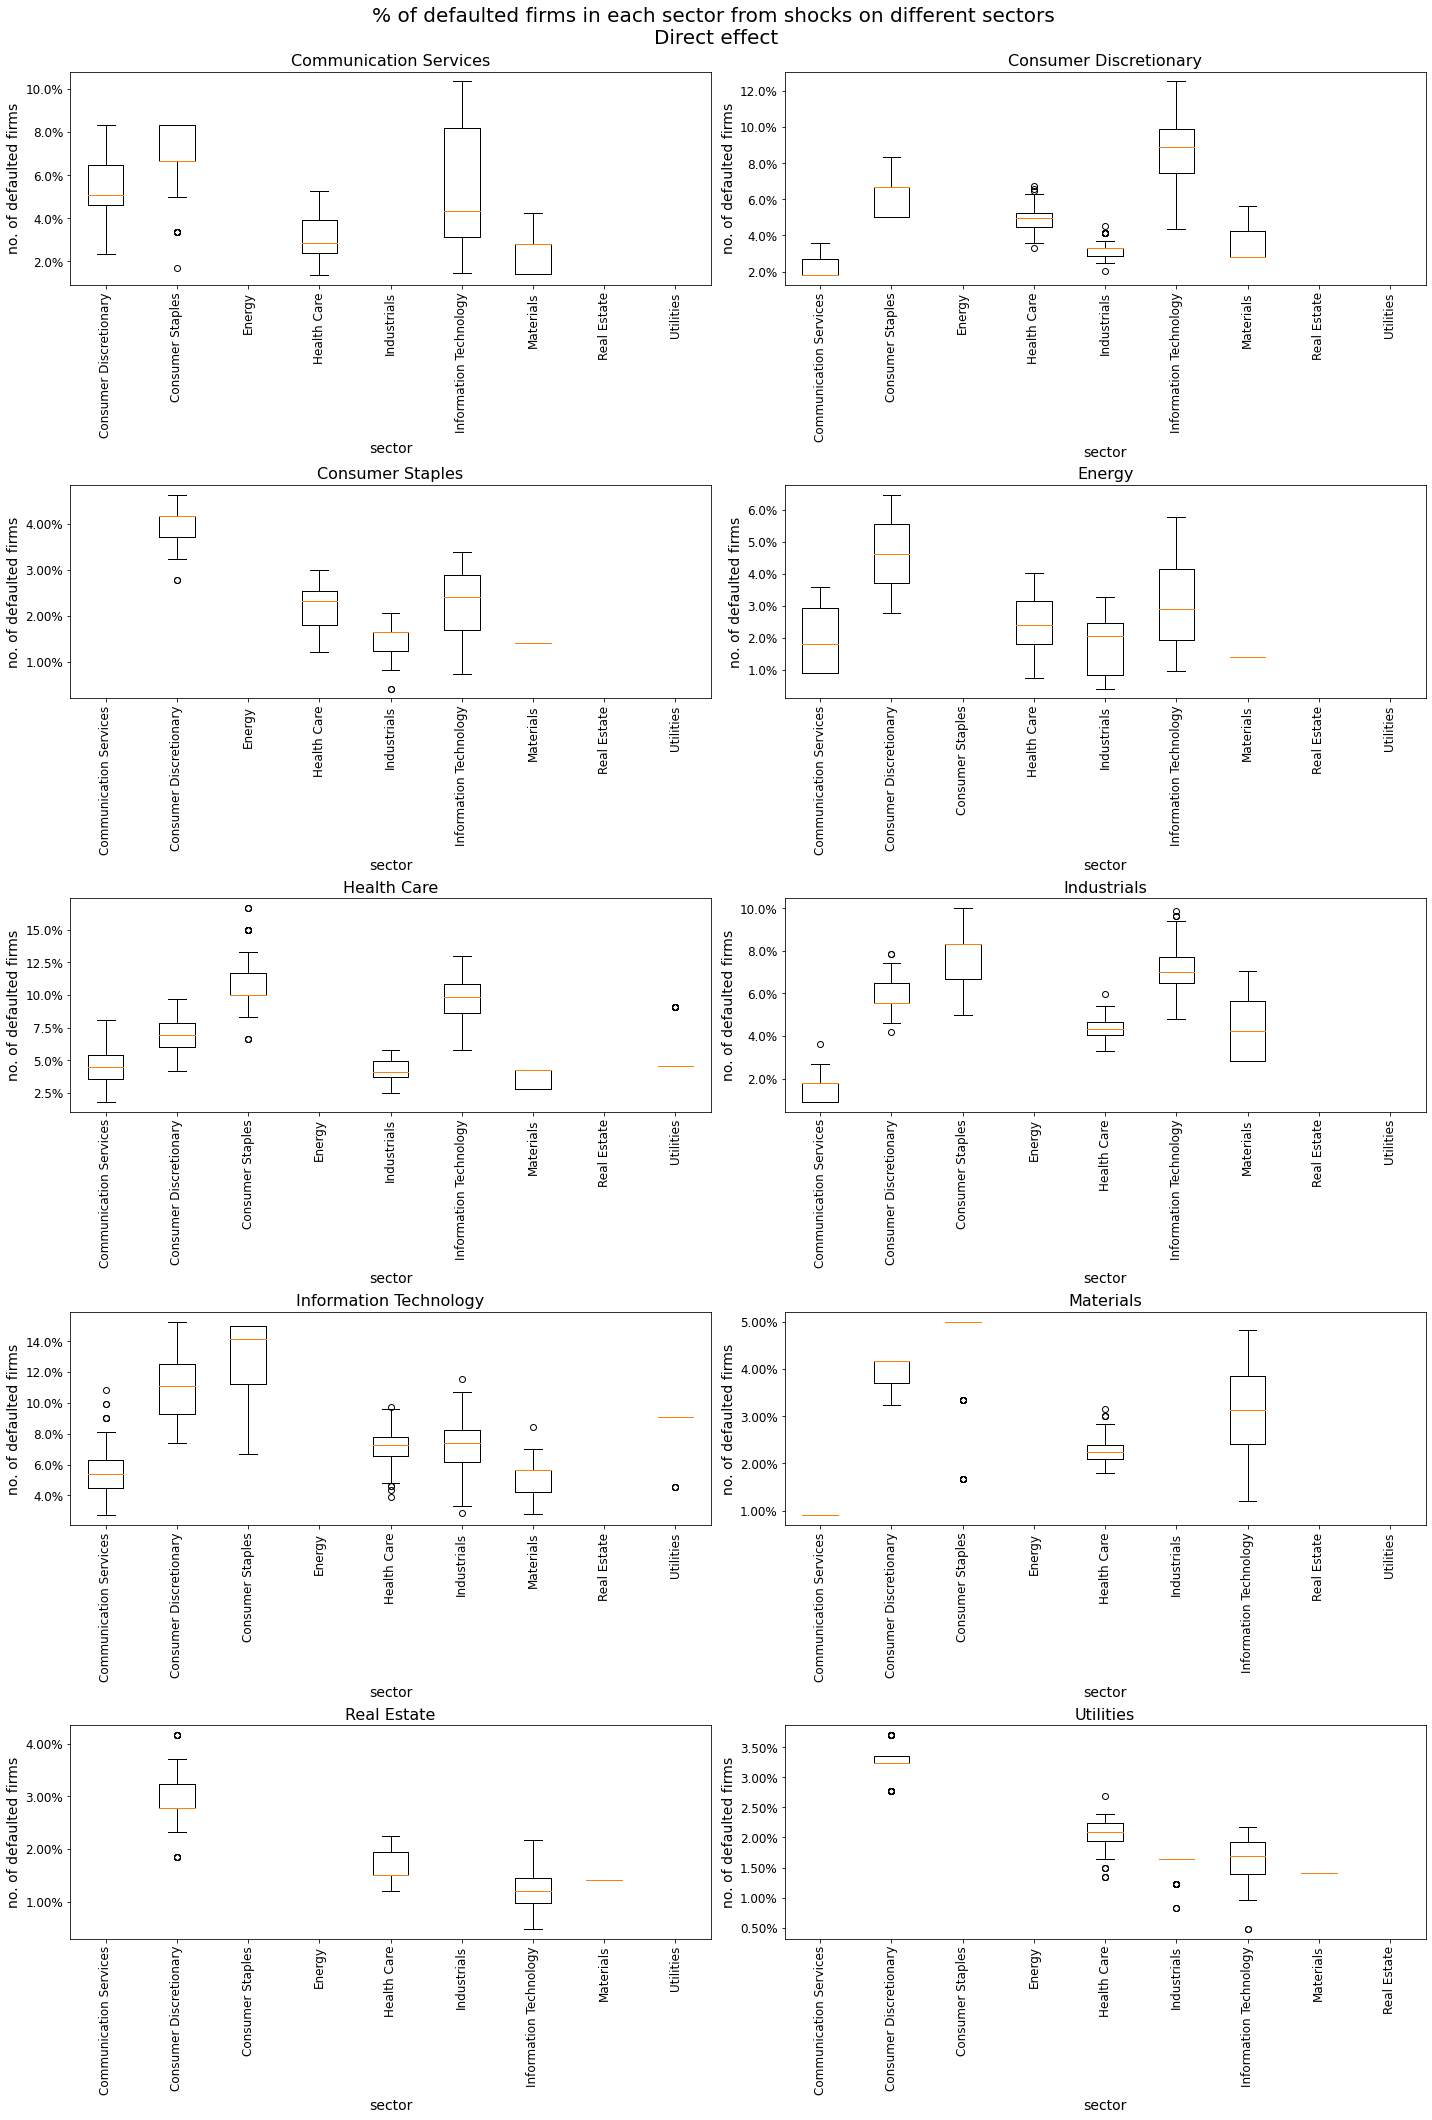

In [6]:
fig = plot_defaults(sectors_dict, "all", 'sectors_direct')

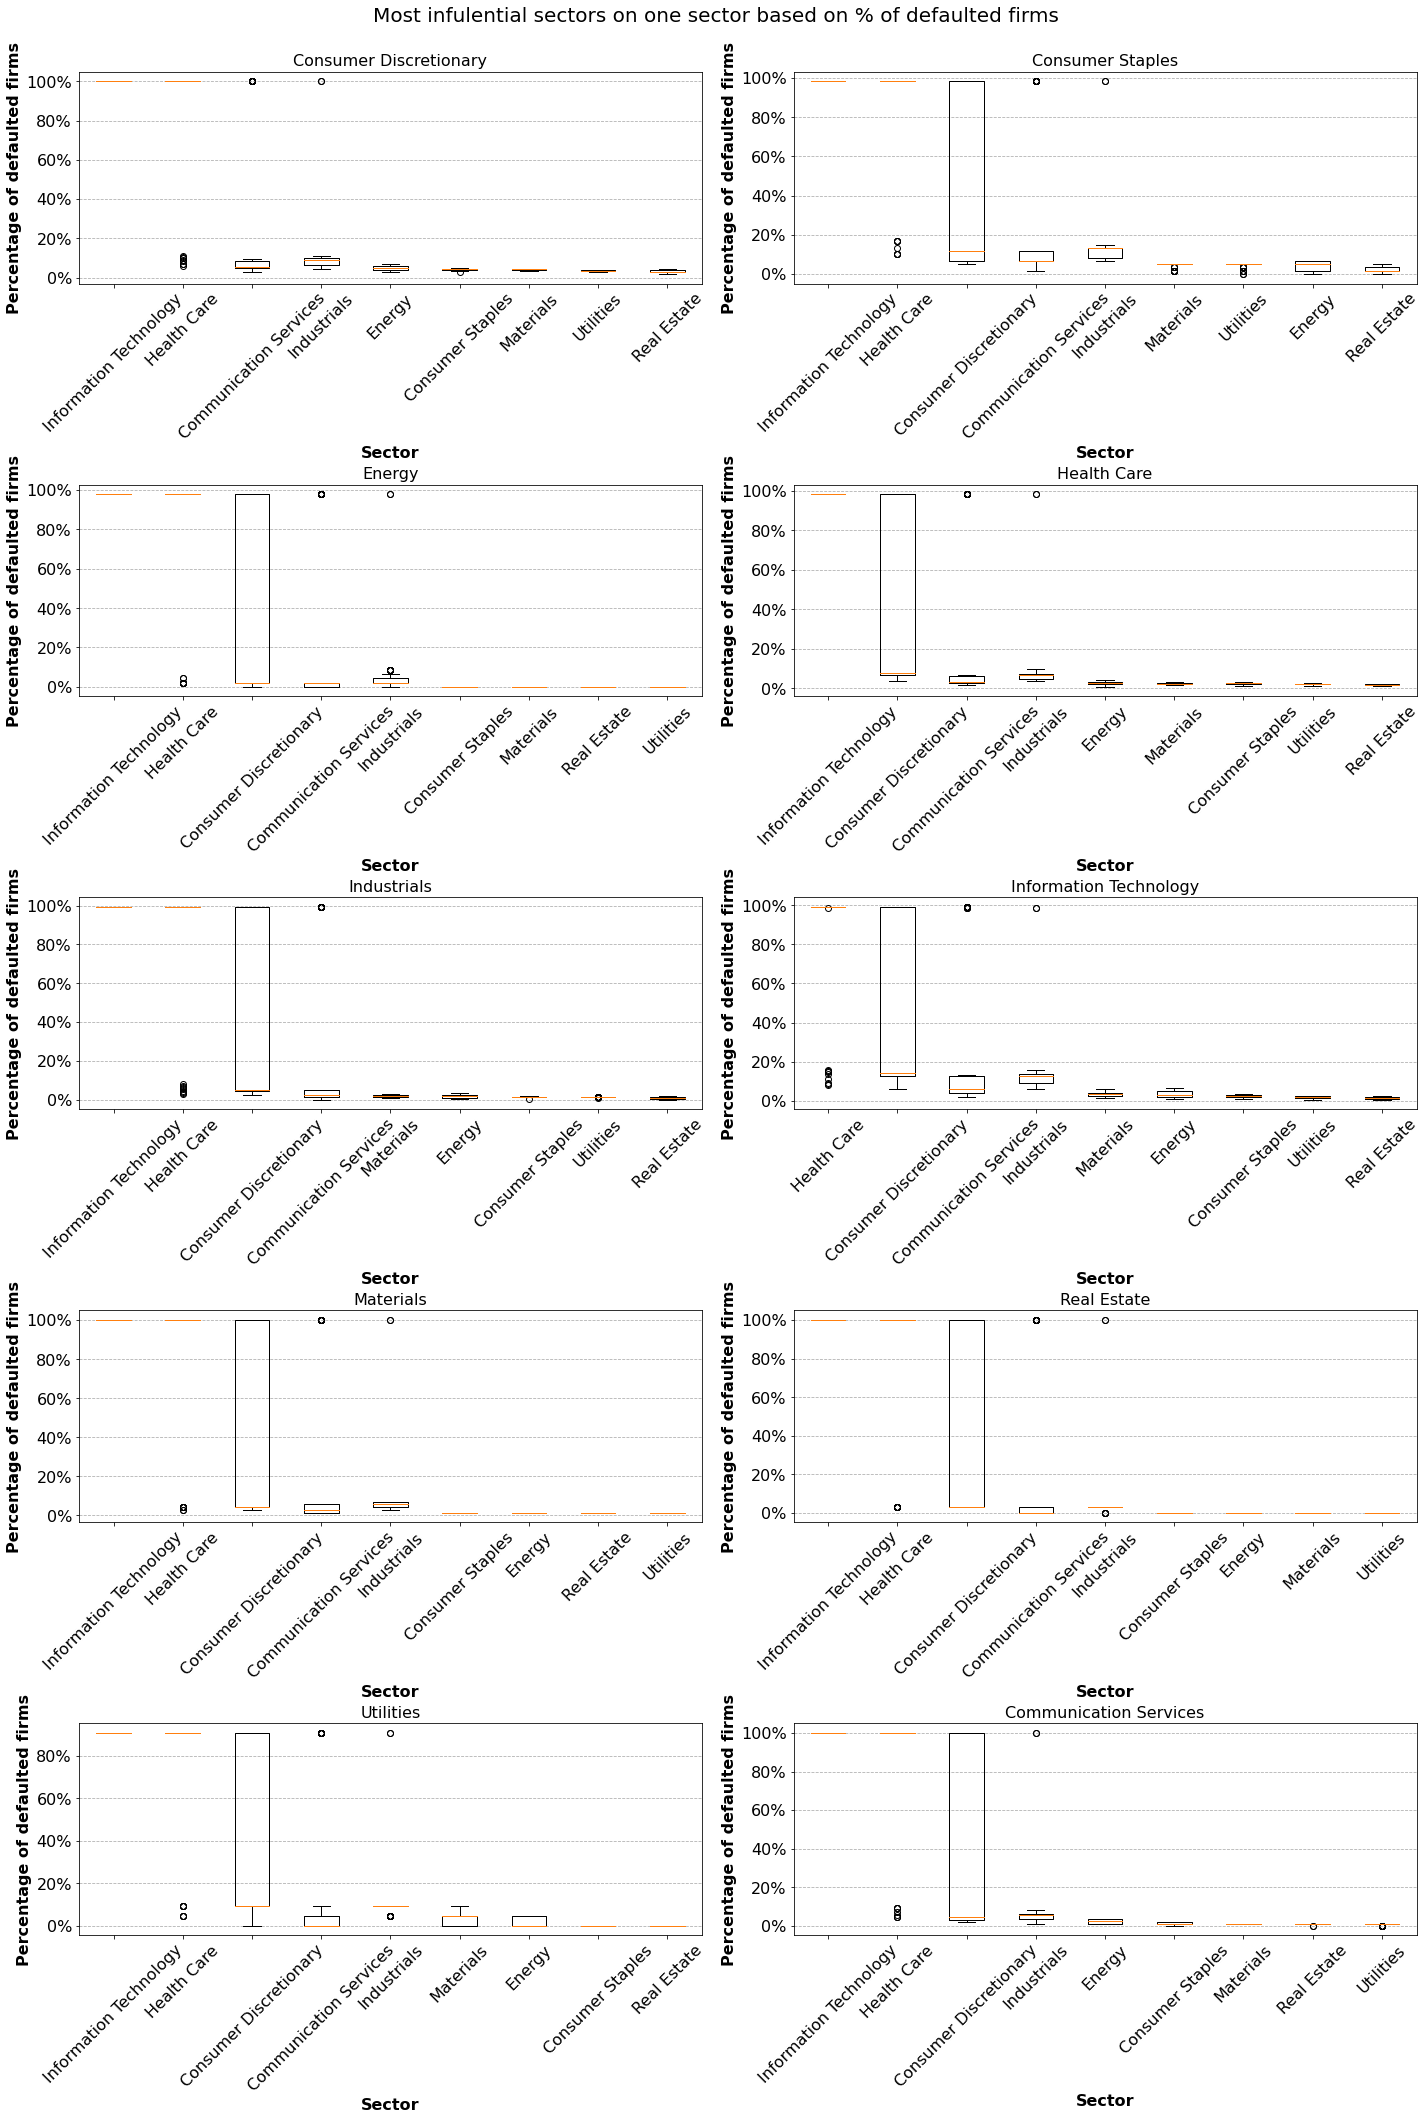

In [4]:
fig = plot_effect_on_sectors_from_other_sectors(sectors_dict)

In [5]:
fig.savefig(f"{config_dict['outputs']['plots']}boxplot_effect_total_demo.png", bbox_inches='tight',dpi=600)

## 2nd Model
parameters:
- distribution: pareto
- alpha: 1.3
- scale parameter: 0.1
- default threshold: 0.5 
- number of simulations: 100

In [7]:
sectors_dict2 = load_simulation_for_all_sectors(config_dict["outputs"]["simulations"], "2022_11_01_125655", config_dict["lists"]["sectors"])

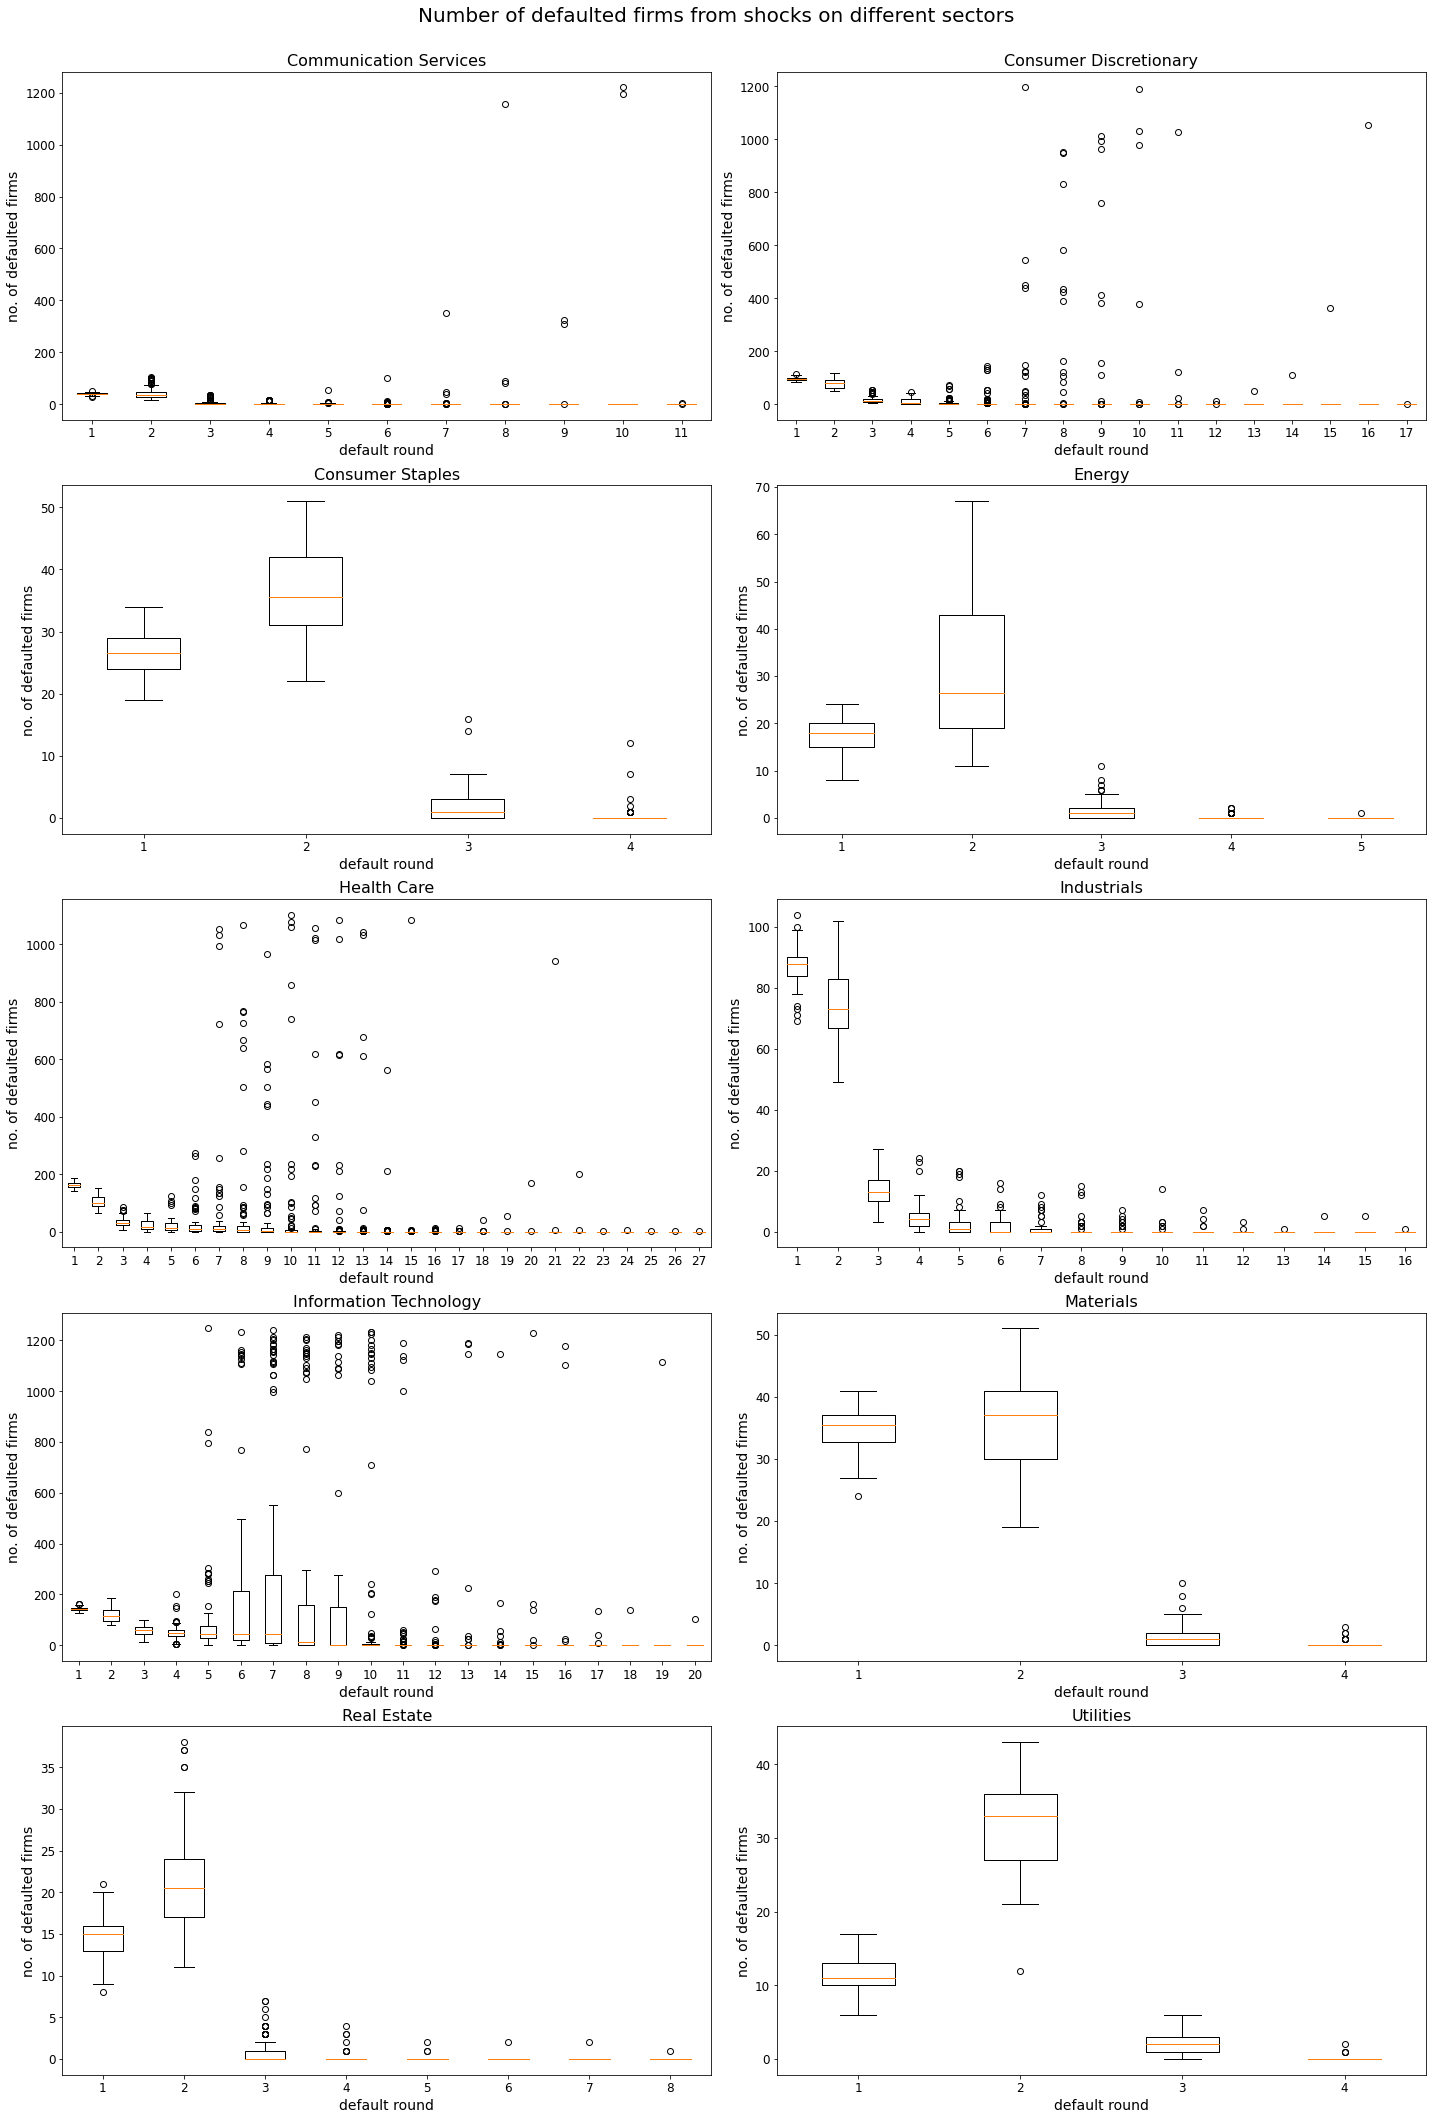

In [8]:
fig = plot_defaults(sectors_dict2, "all", 'rounds')

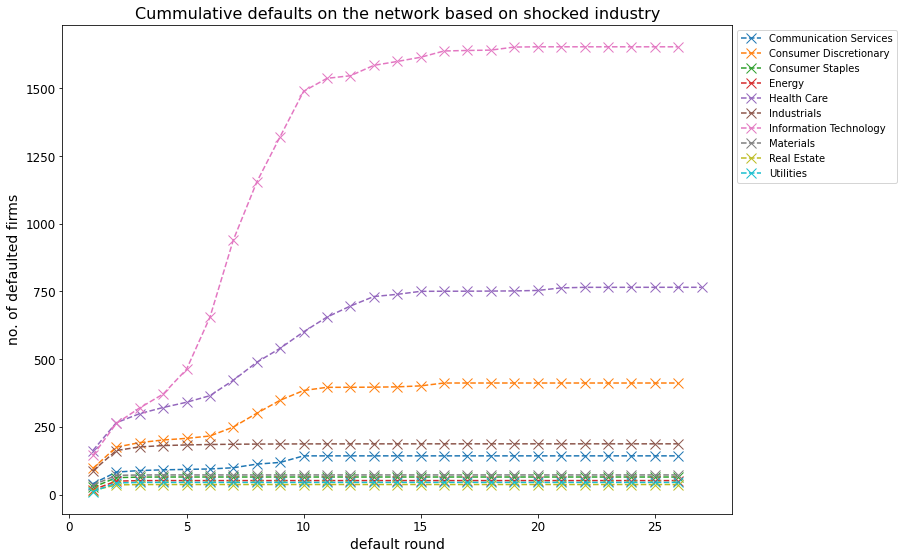

In [9]:
fig = plot_cummulative_defaults(sectors_dict2)

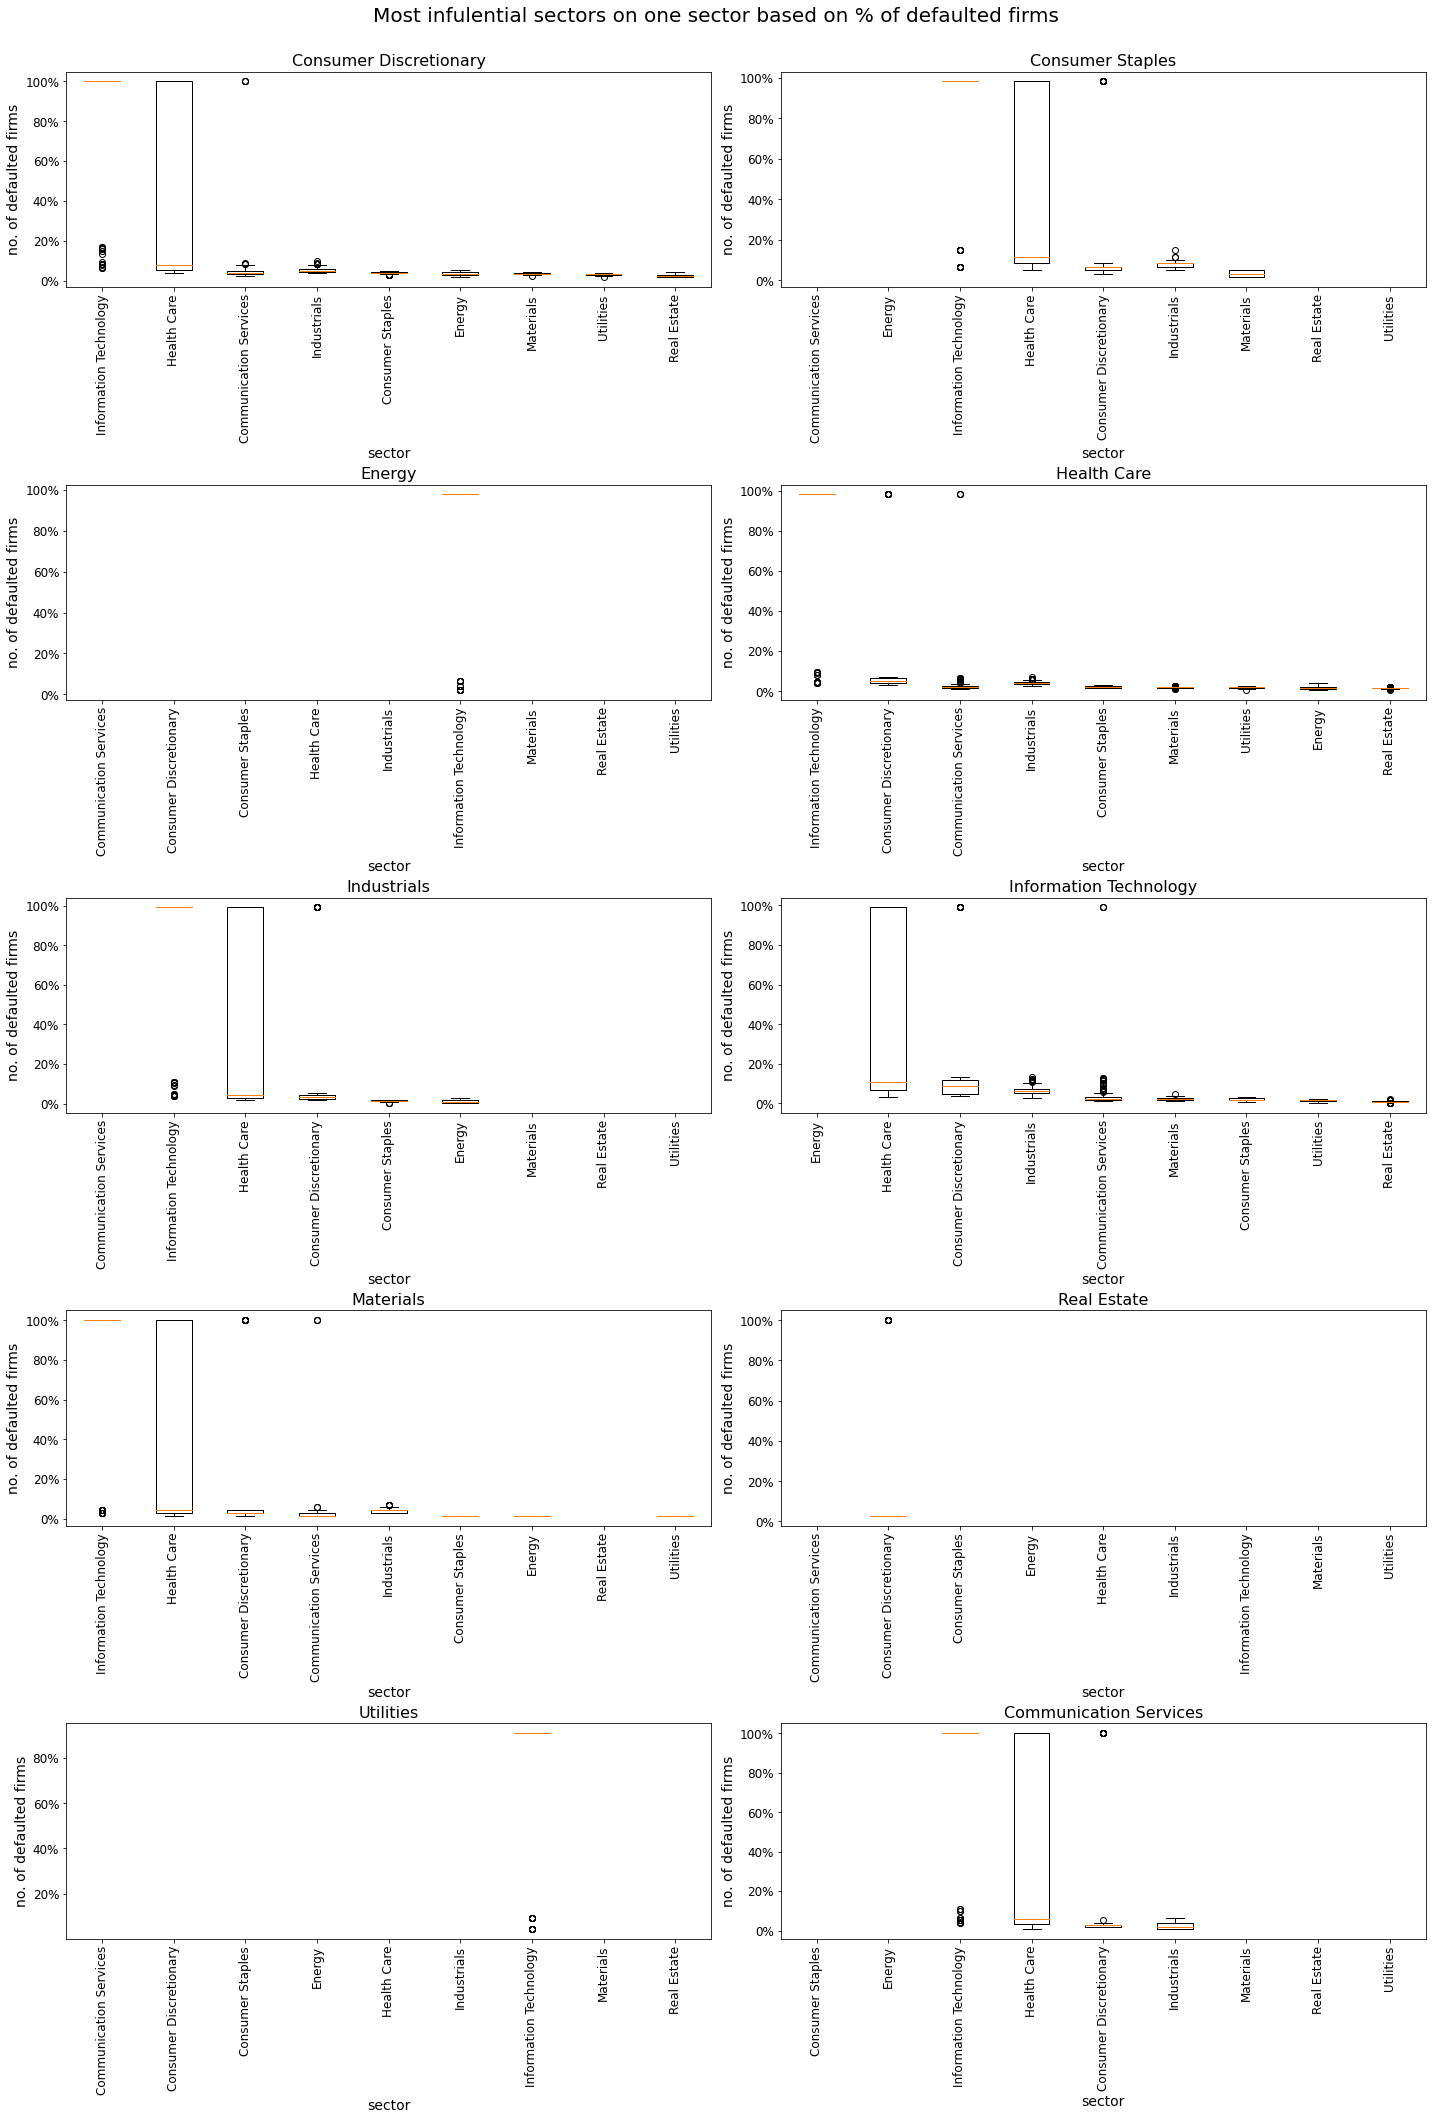

In [11]:
fig = plot_effect_on_sectors_from_other_sectors(sectors_dict2)

In [ ]:
fig = plot_defaults(sectors_dict2, "all", 'sectors_total')

In [ ]:
fig = plot_defaults(sectors_dict2, "all", 'sectors_direct')

In [ ]:
fig = plot_effect_on_sectors_from_other_sectors(sectors_dict2)

## 3rd Model
parameters:
- distribution: pareto
- alpha: 0.7
- scale parameter: 0.1
- default threshold: 0.3 (if a firm loses 70% of their equity, they default)
- number of simulations: 1000

In [8]:
sectors_dict3 = load_simulation_for_all_sectors(config_dict["outputs"]["simulations"], "2022_11_01_132601", config_dict["lists"]["sectors"])

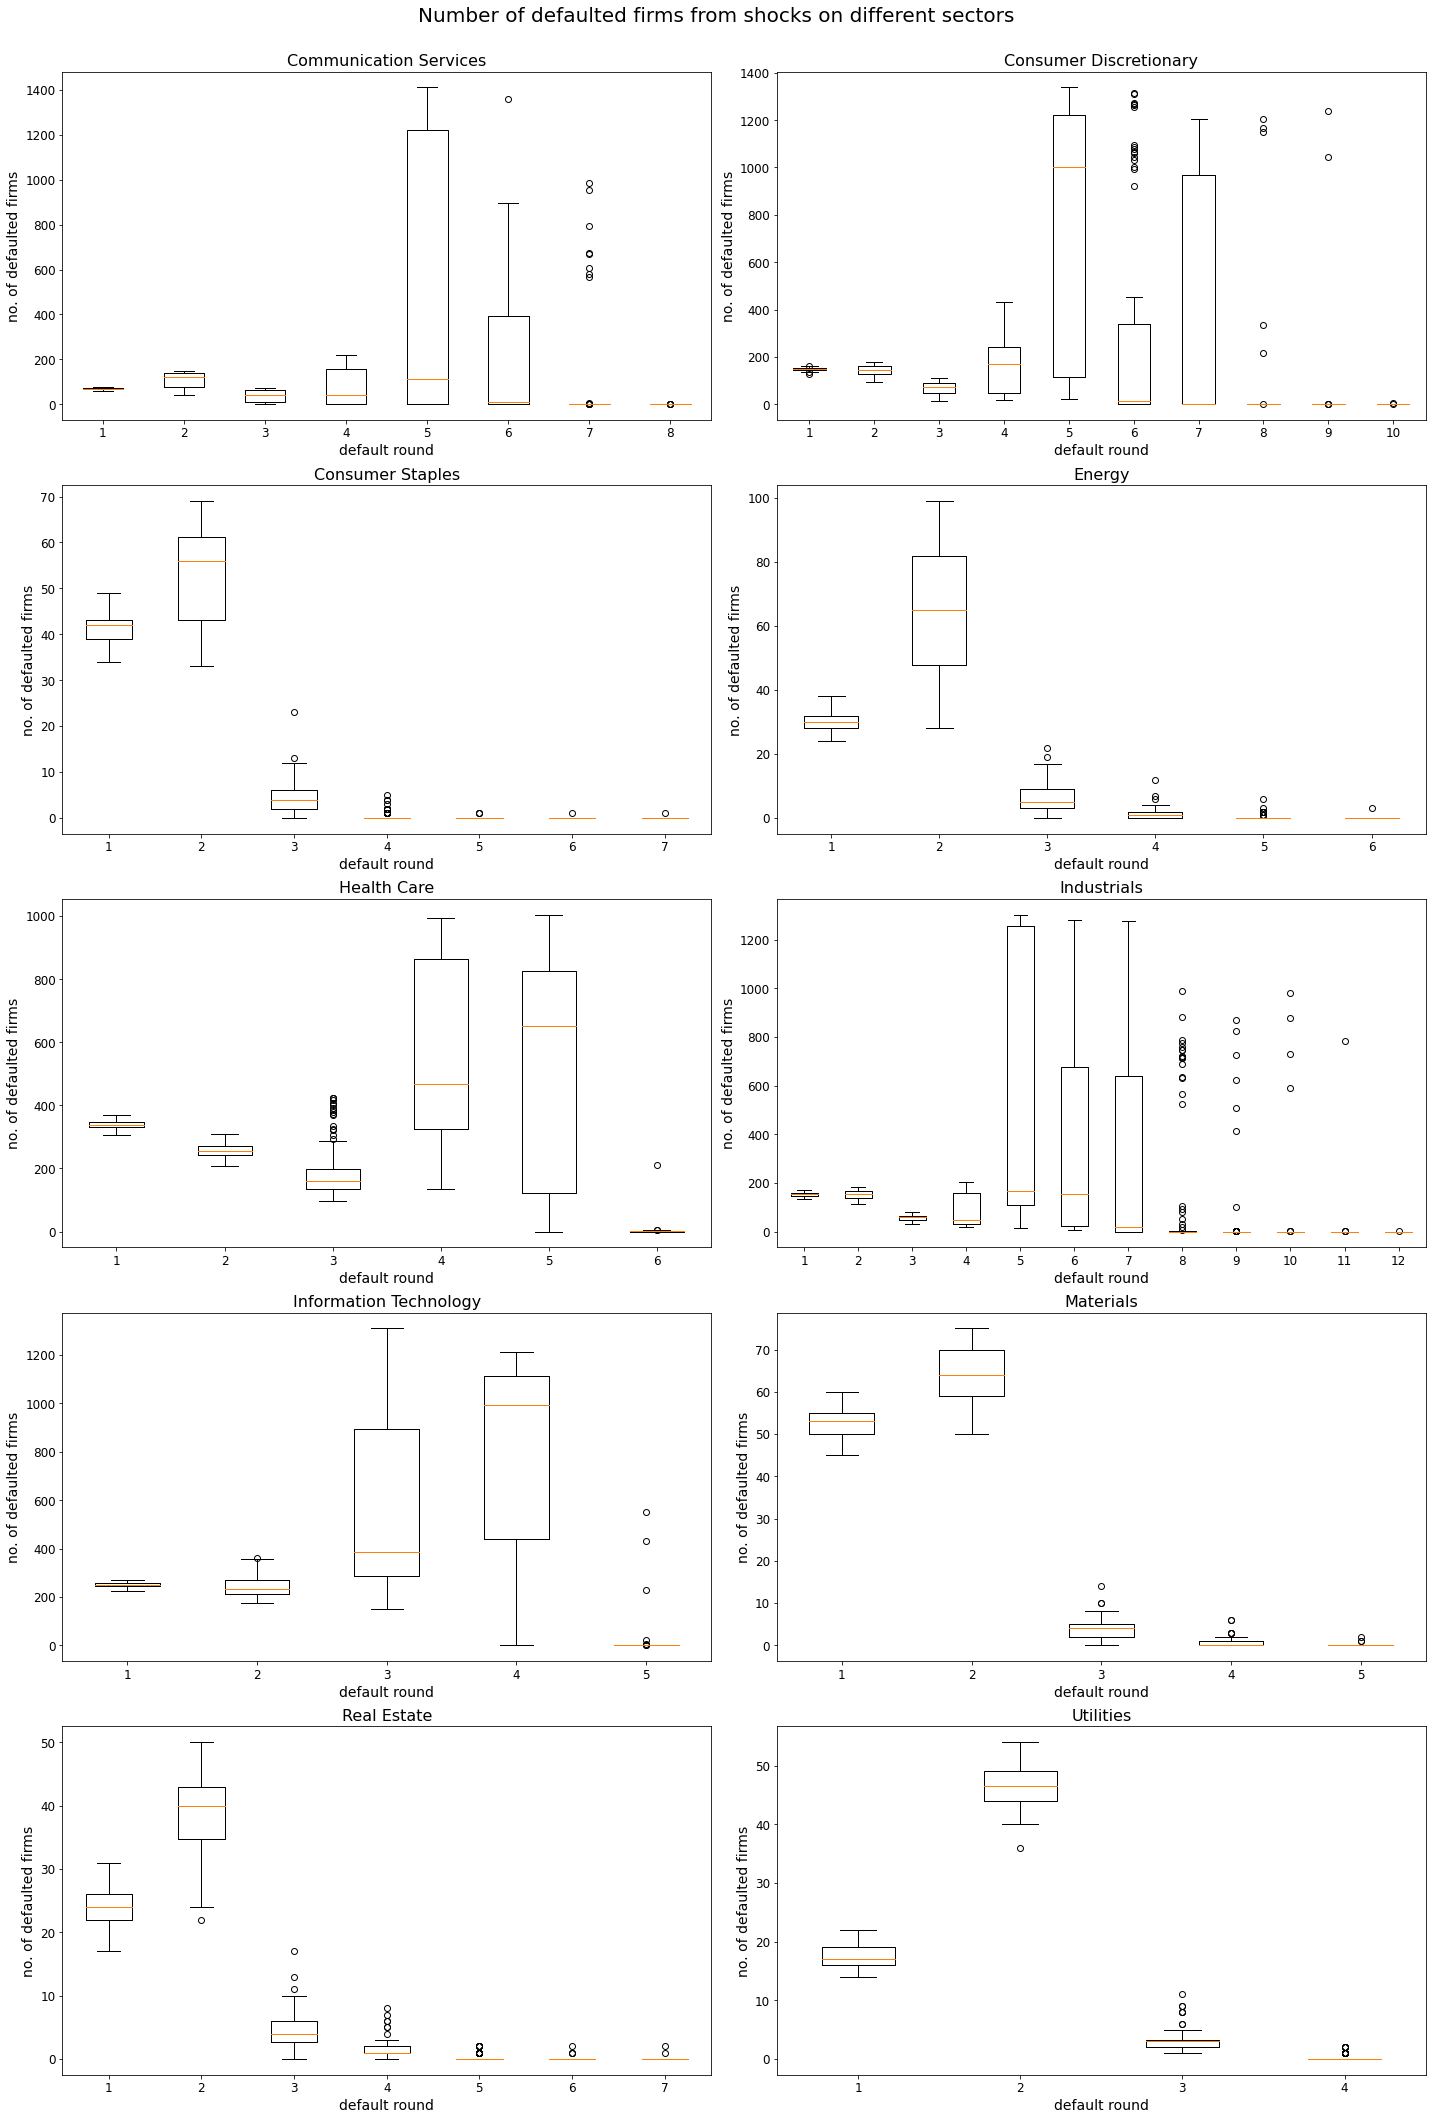

In [10]:
fig = plot_defaults(sectors_dict3, "all", 'rounds')

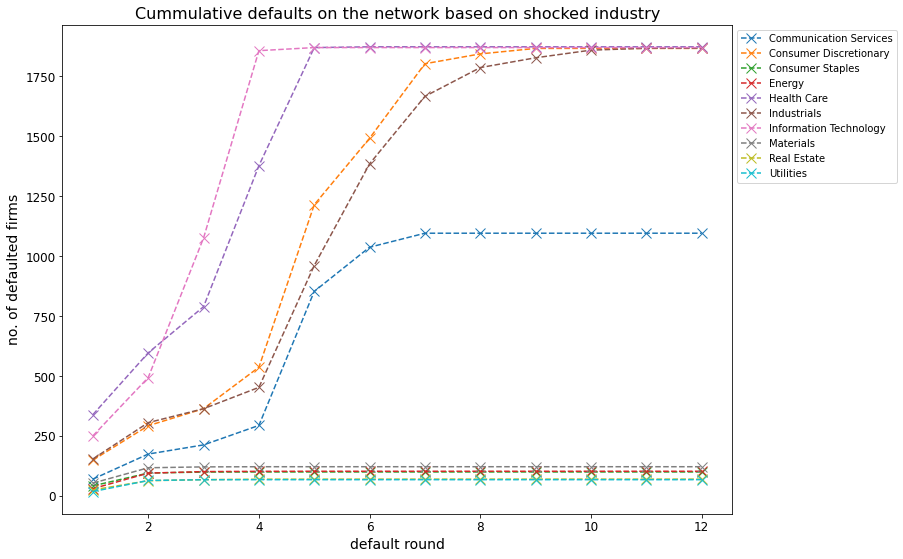

In [13]:
fig = plot_cummulative_defaults(sectors_dict3)

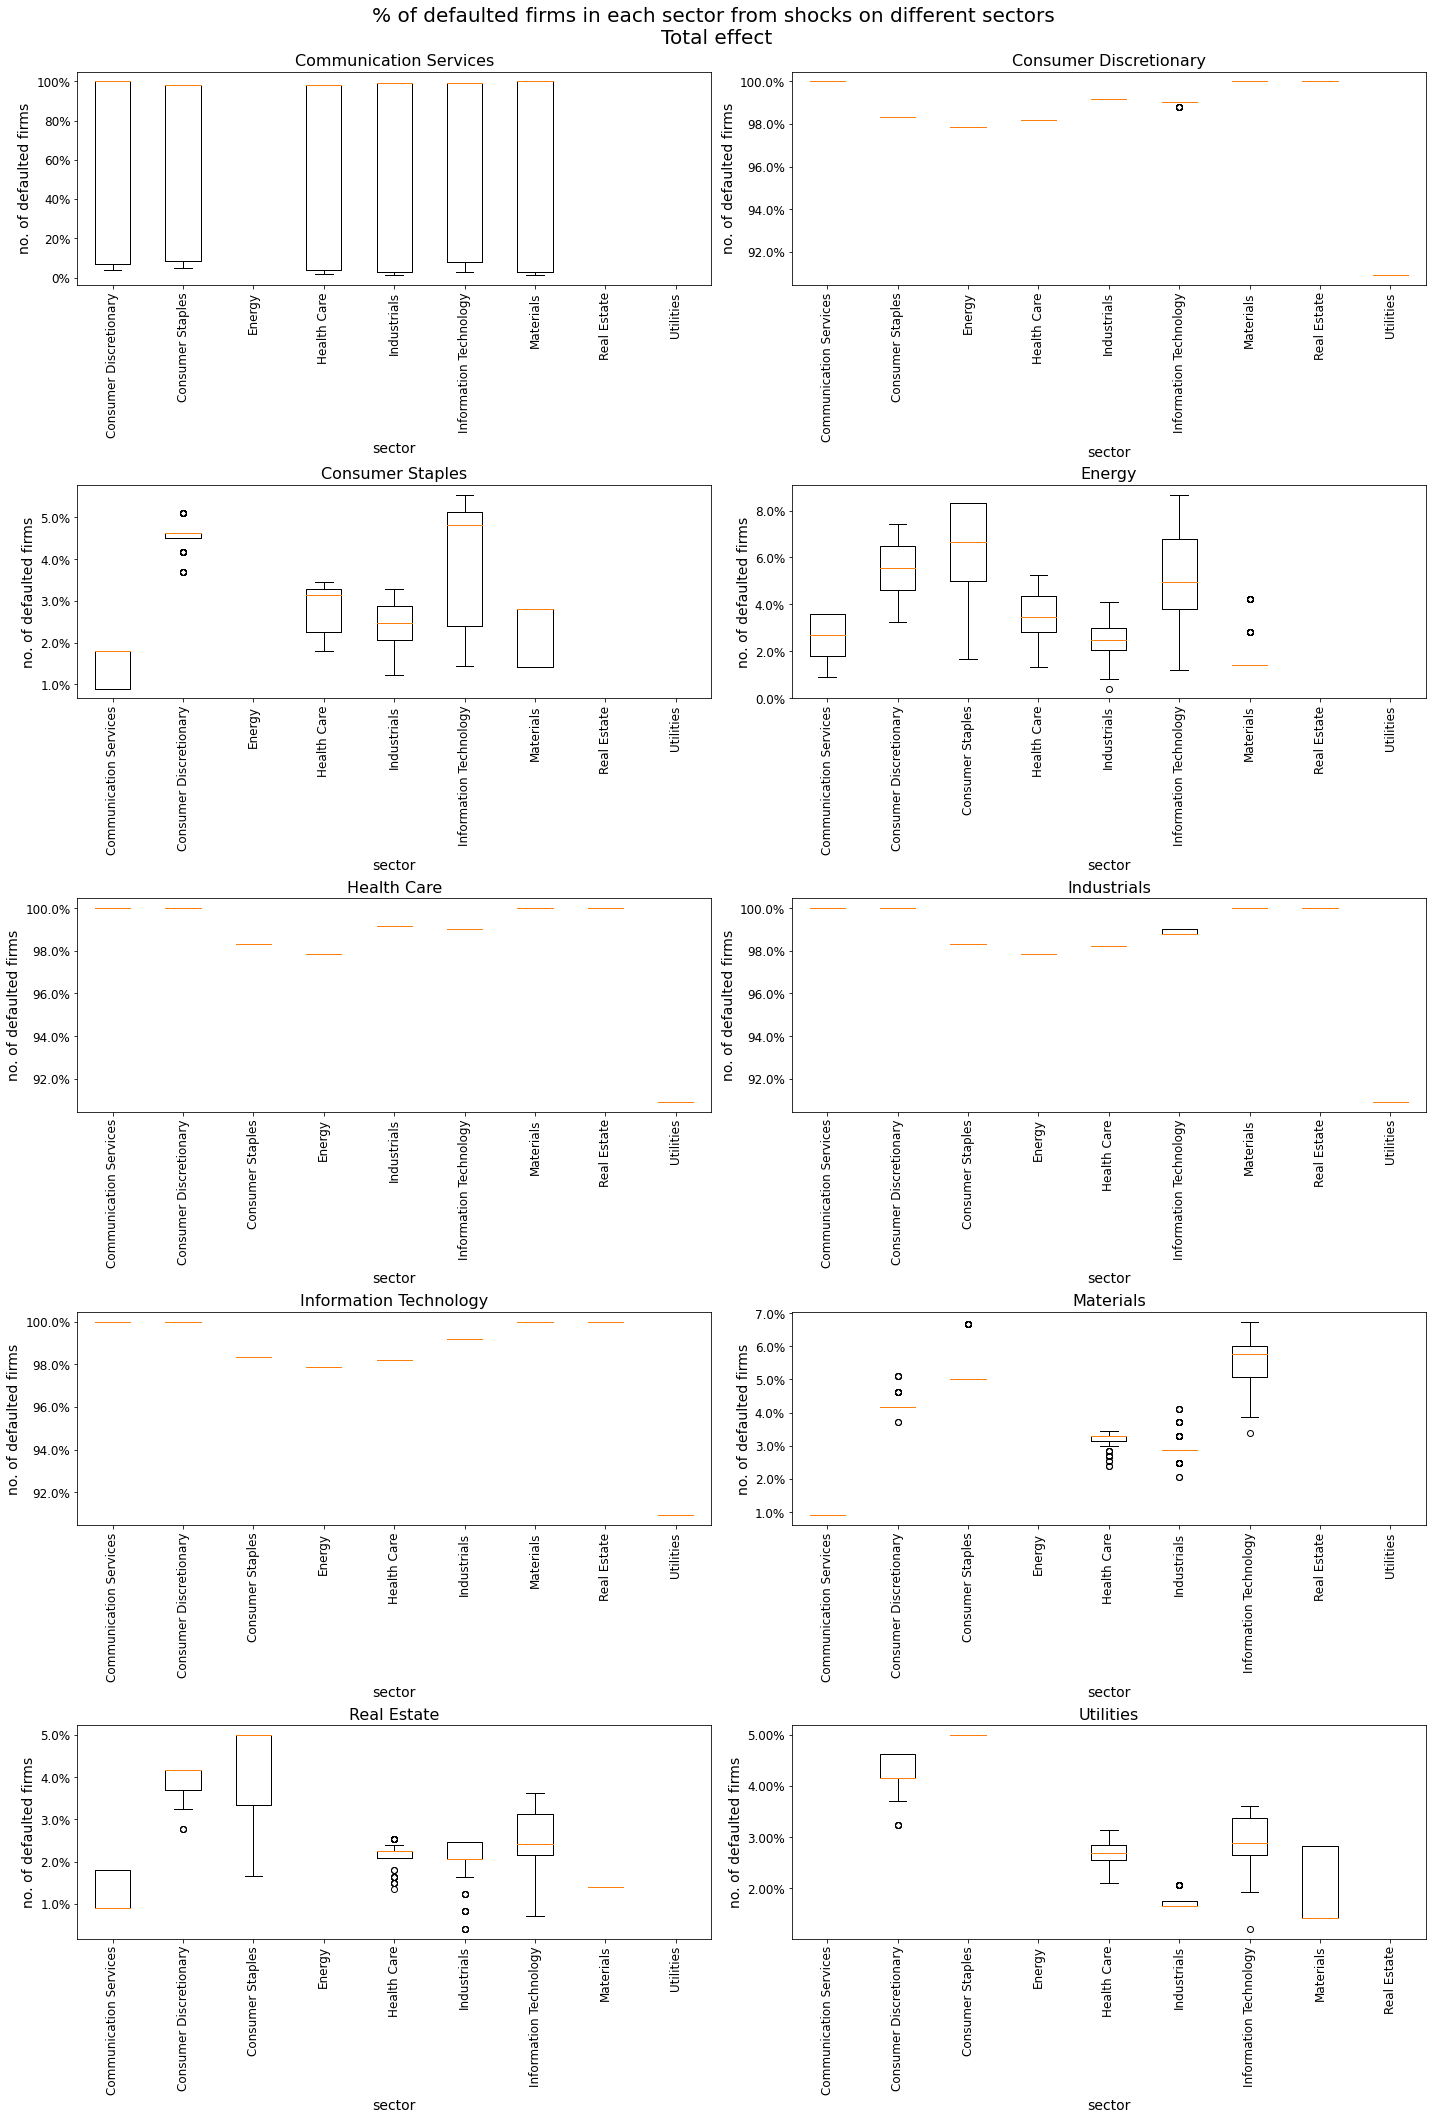

In [14]:
fig = plot_defaults(sectors_dict3, "all", 'sectors_total')

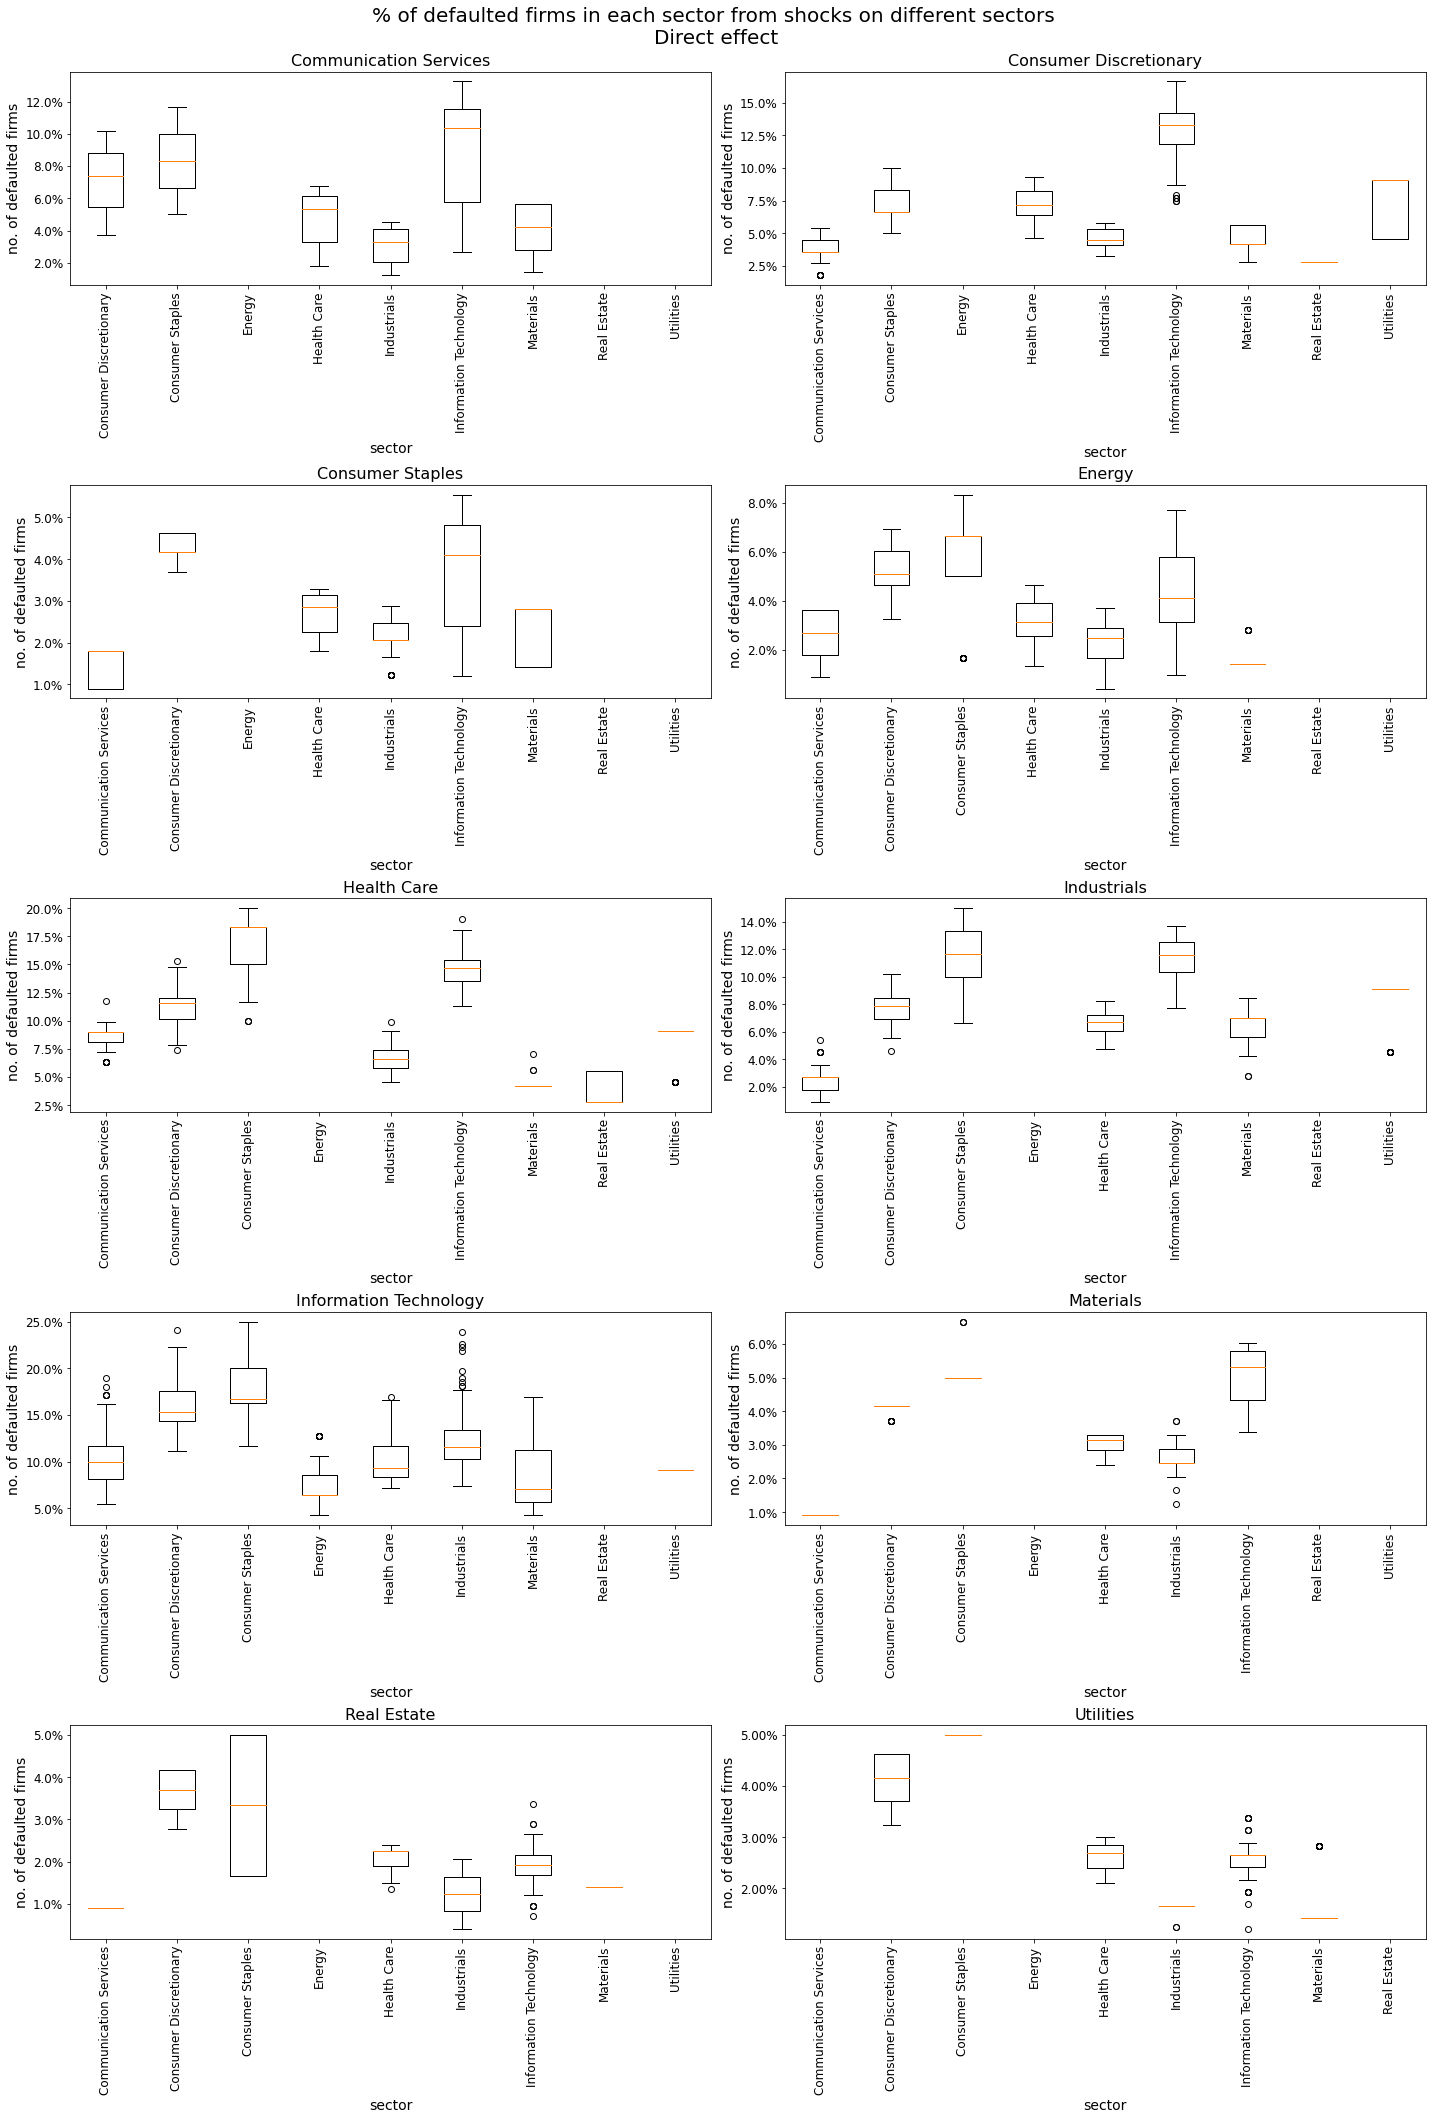

In [11]:
fig = plot_defaults(sectors_dict3, "all", 'sectors_direct')

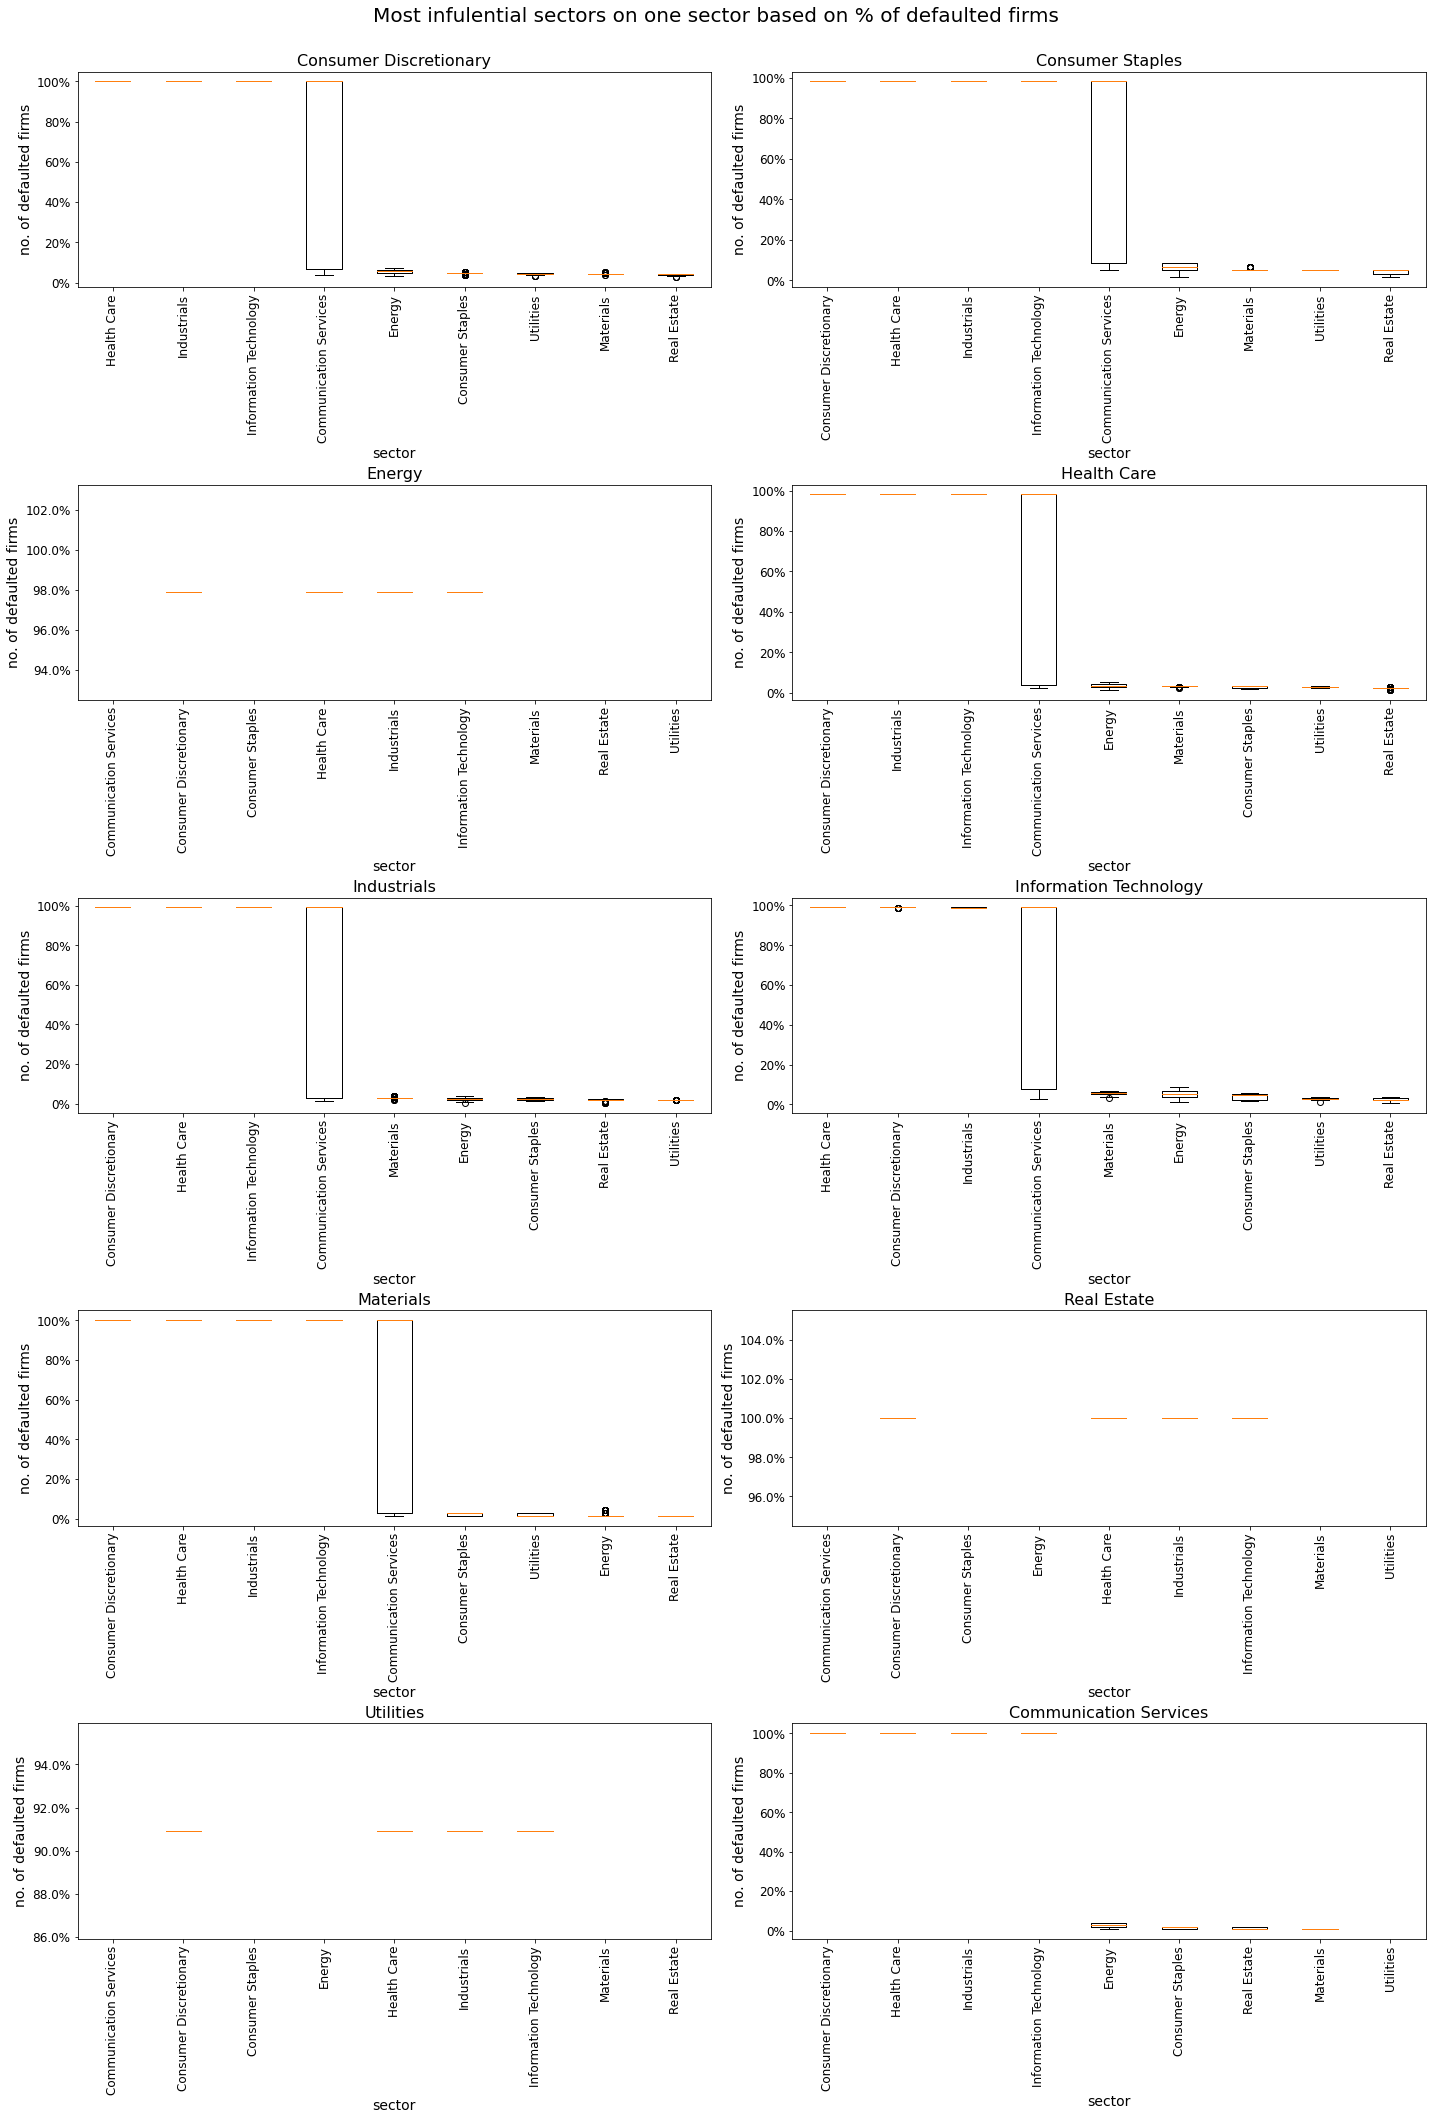

In [12]:
fig = plot_effect_on_sectors_from_other_sectors(sectors_dict3)

## 4th Model
parameters:
- distribution: pareto
- alpha: 1.3
- scale parameter: 0.1
- default threshold: 0.6
- number of simulations: 100

In [3]:
sectors_dict4 = load_simulation_for_all_sectors(config_dict["outputs"]["simulations"], "2022_11_01_135722", config_dict["lists"]["sectors"])

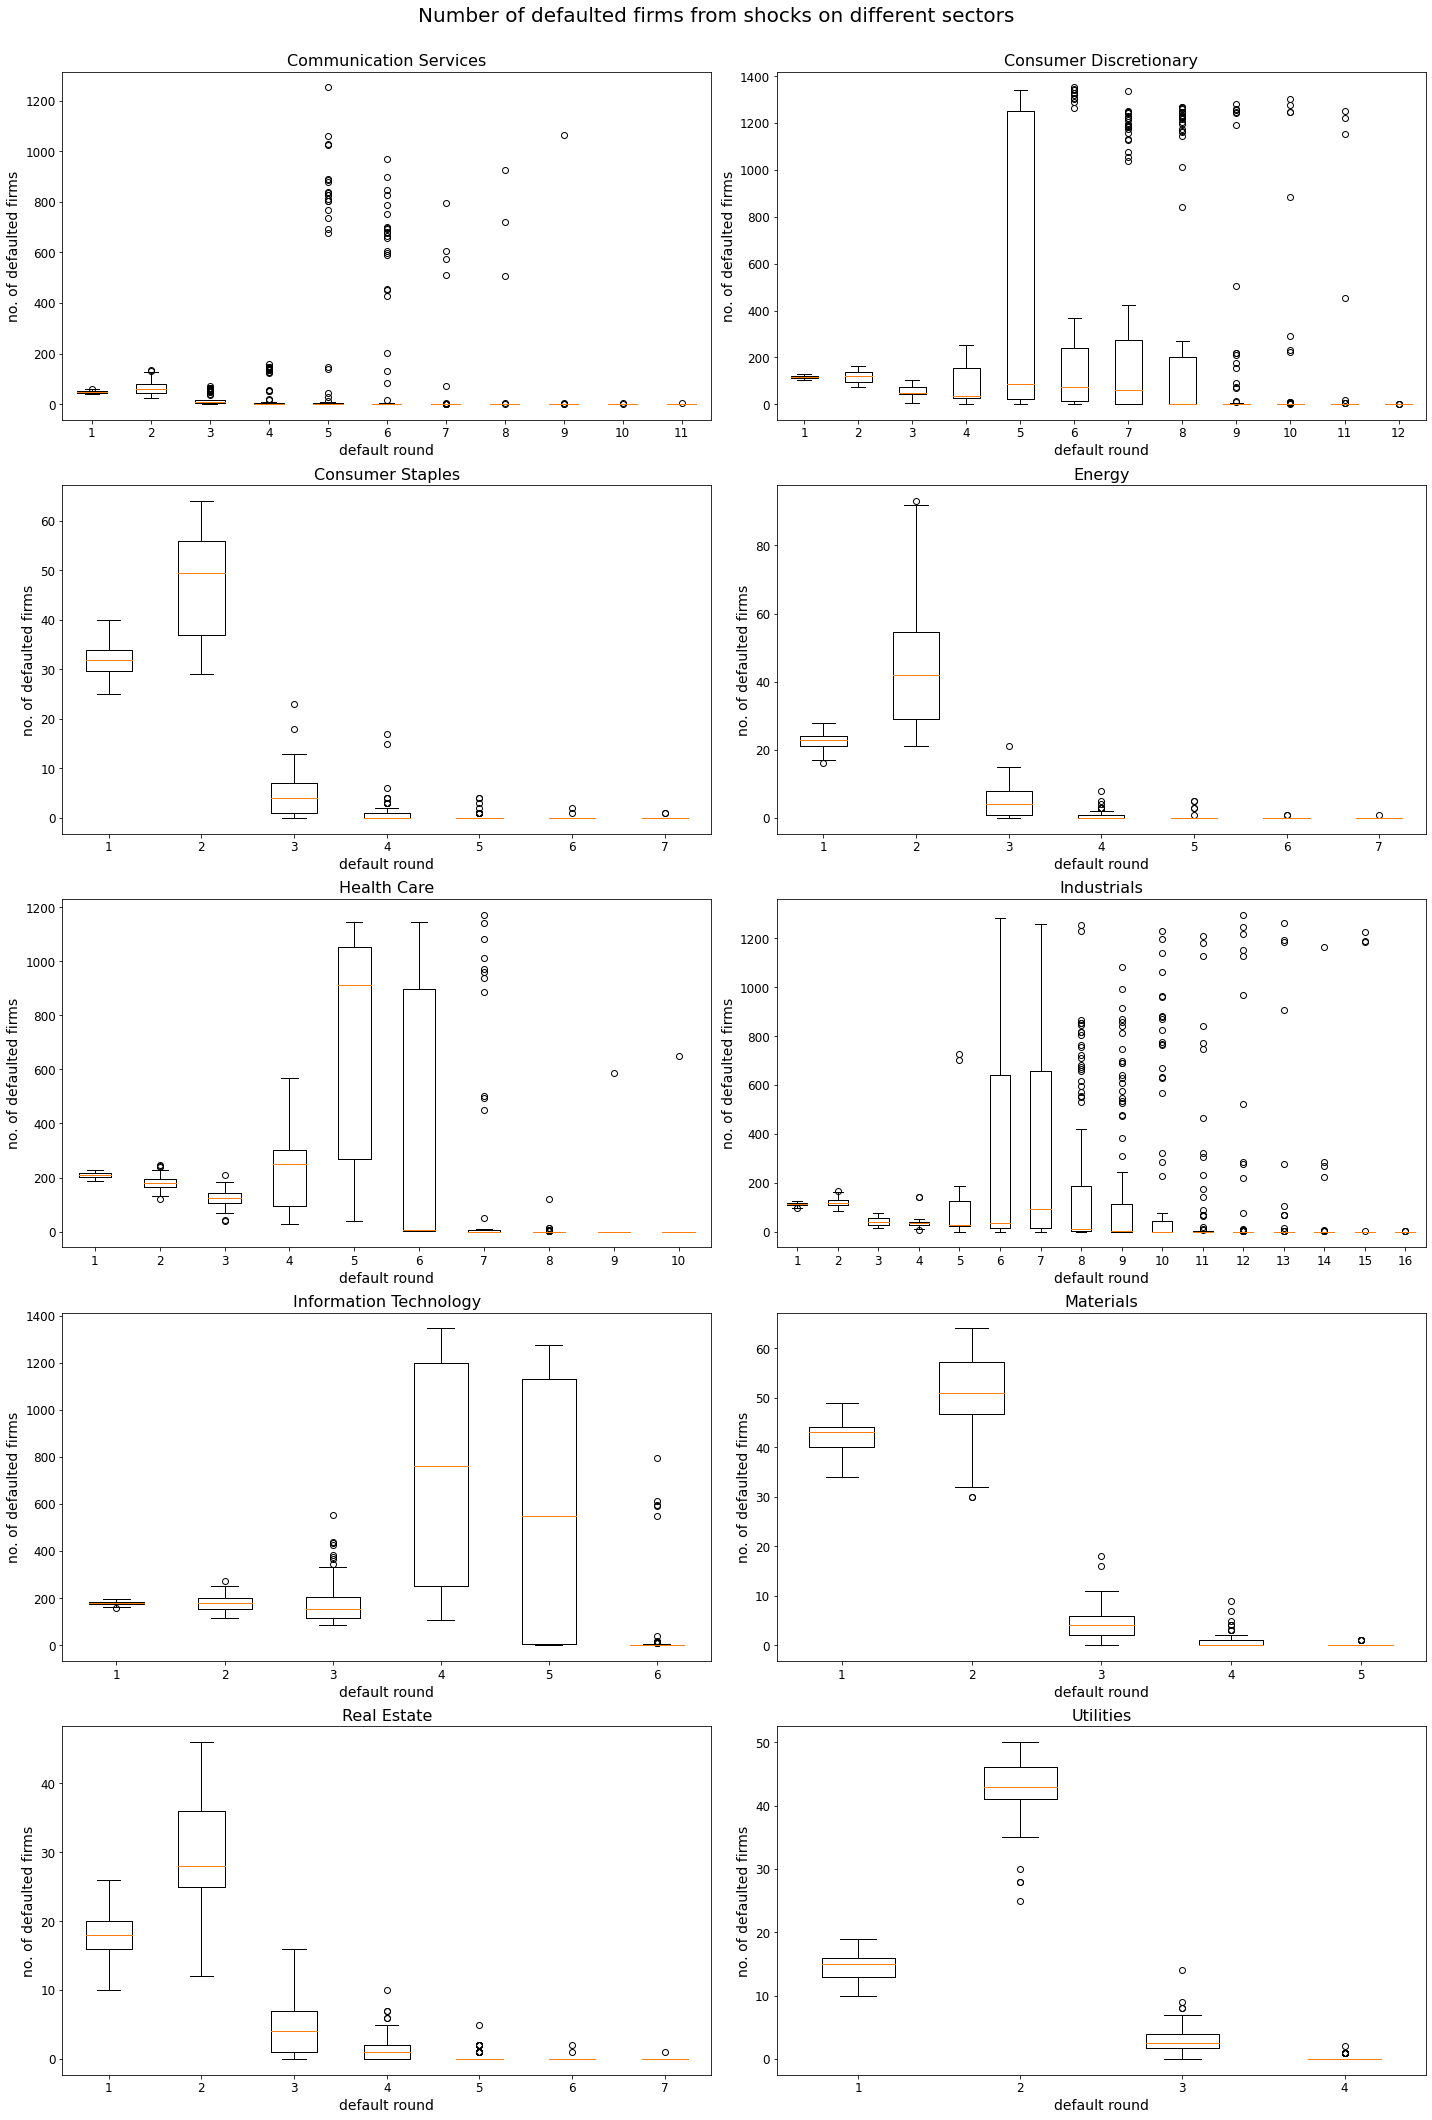

In [4]:
fig = plot_defaults(sectors_dict4, "all", 'rounds')

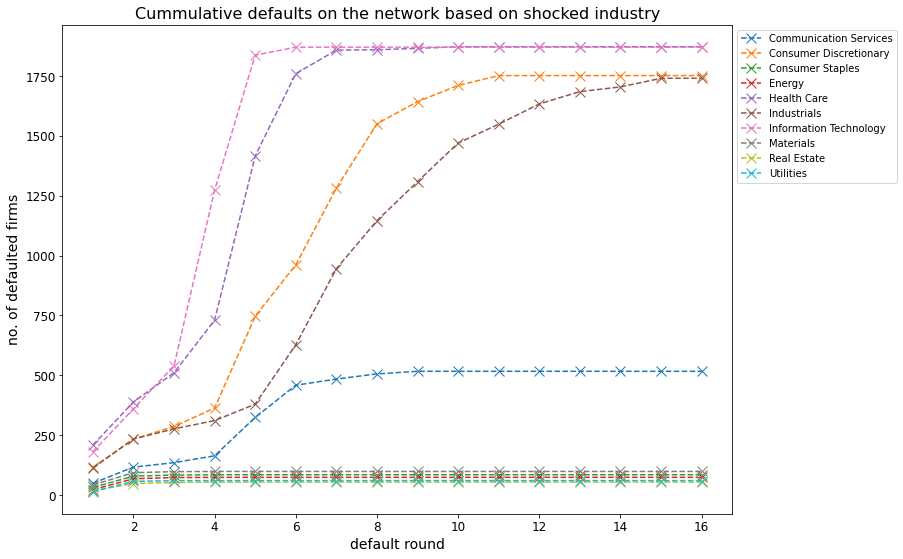

In [5]:
fig = plot_cummulative_defaults(sectors_dict4)

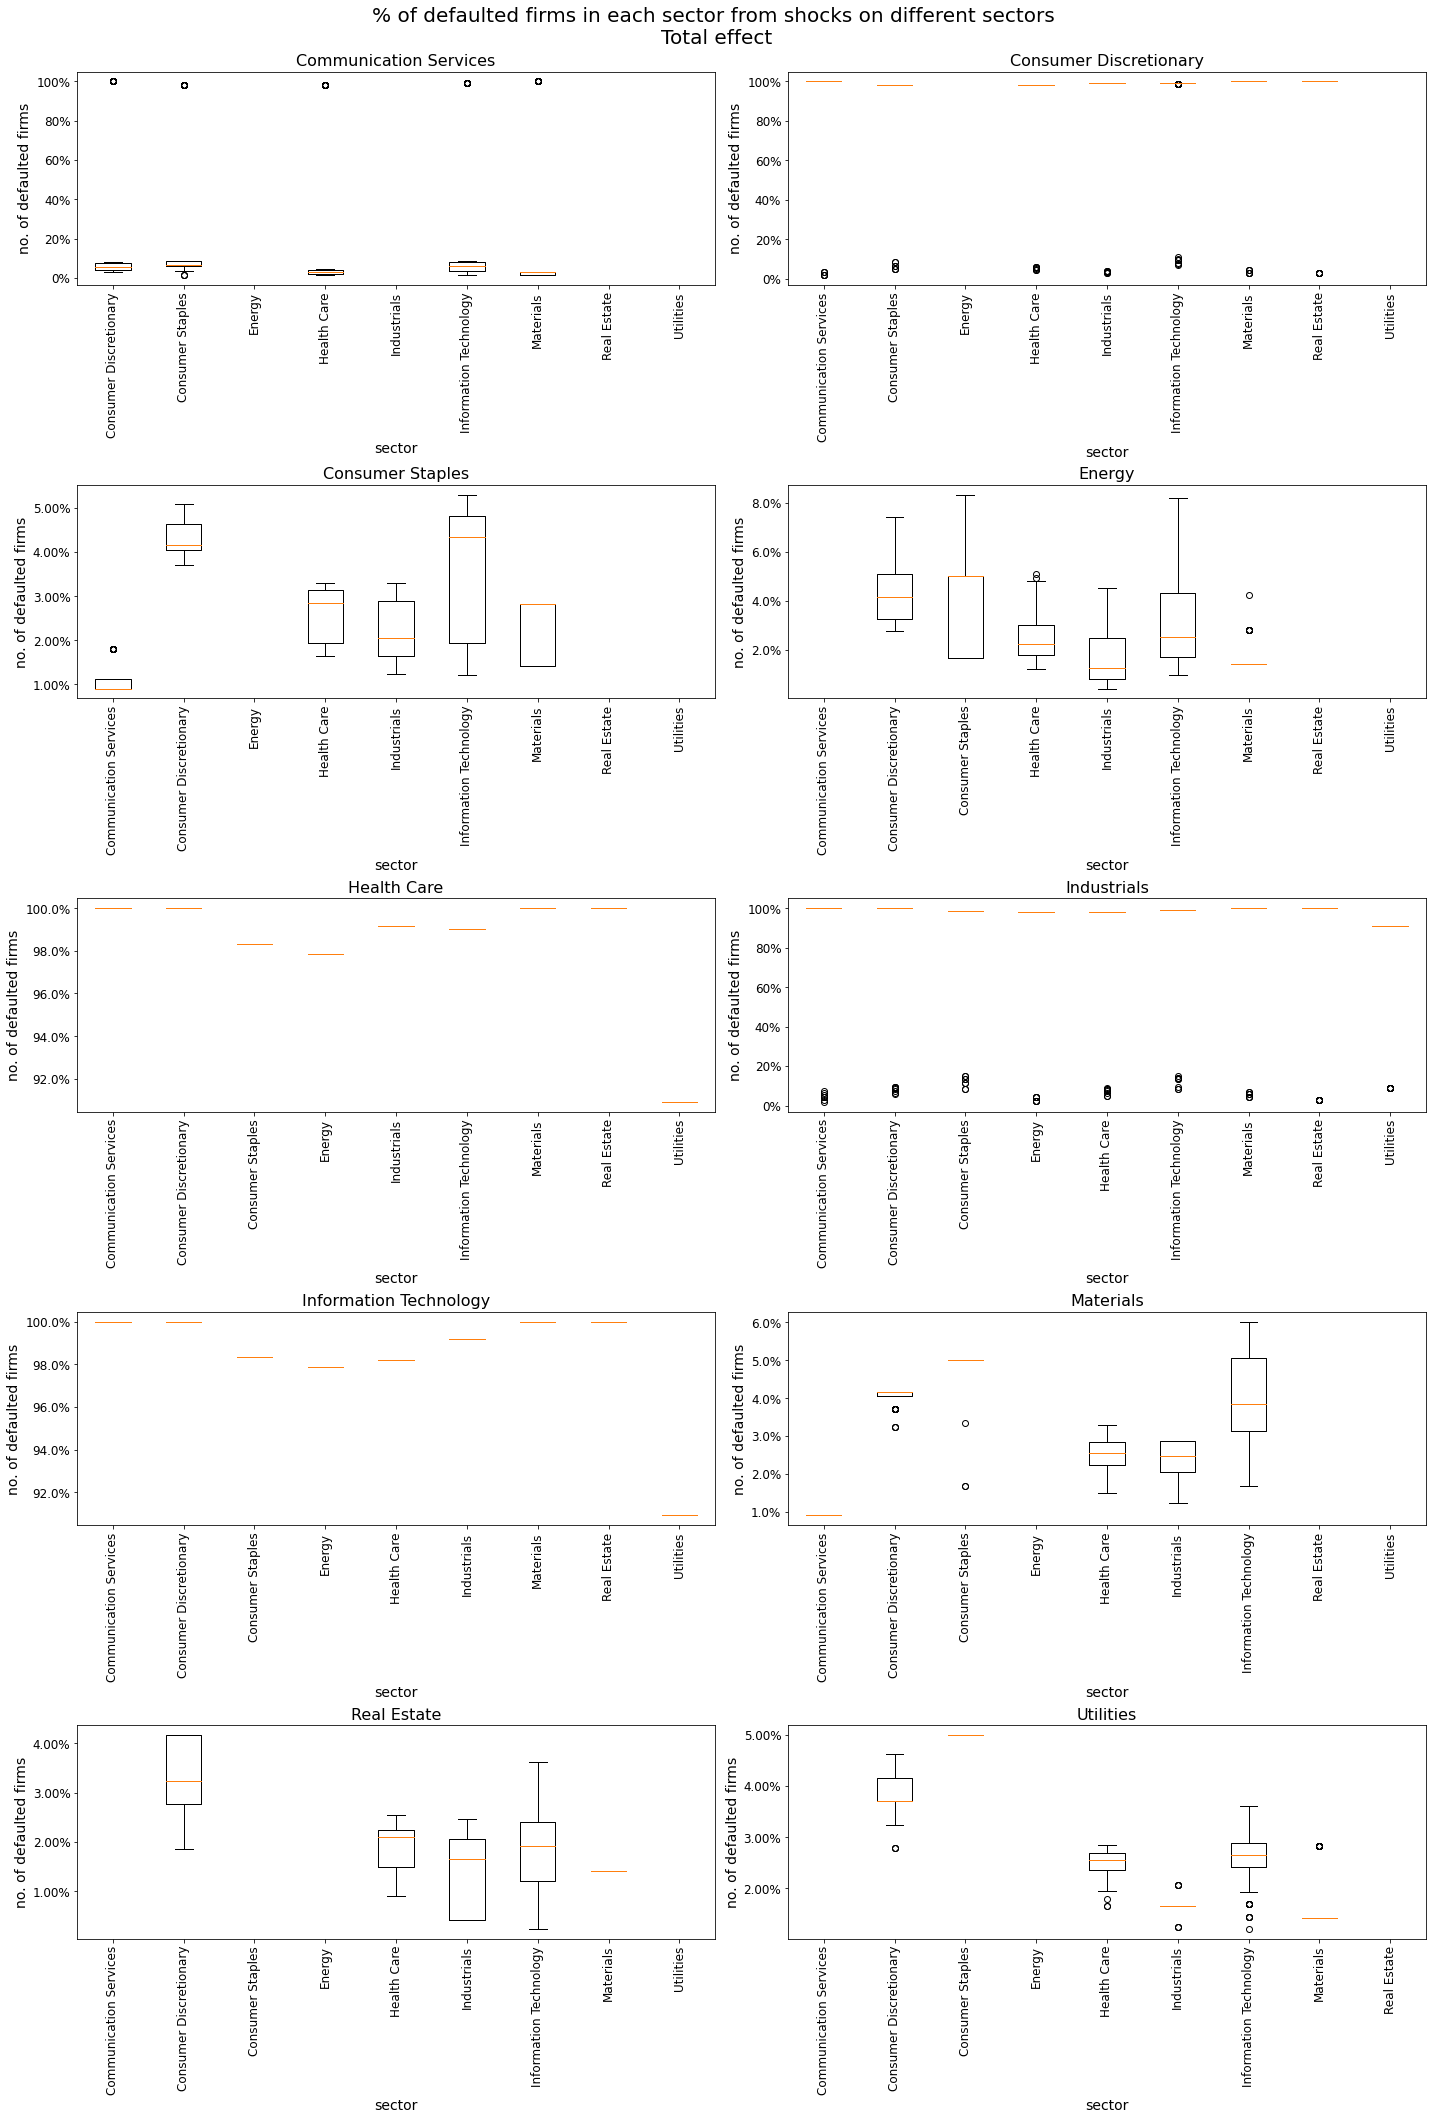

In [6]:
fig = plot_defaults(sectors_dict4, "all", 'sectors_total')

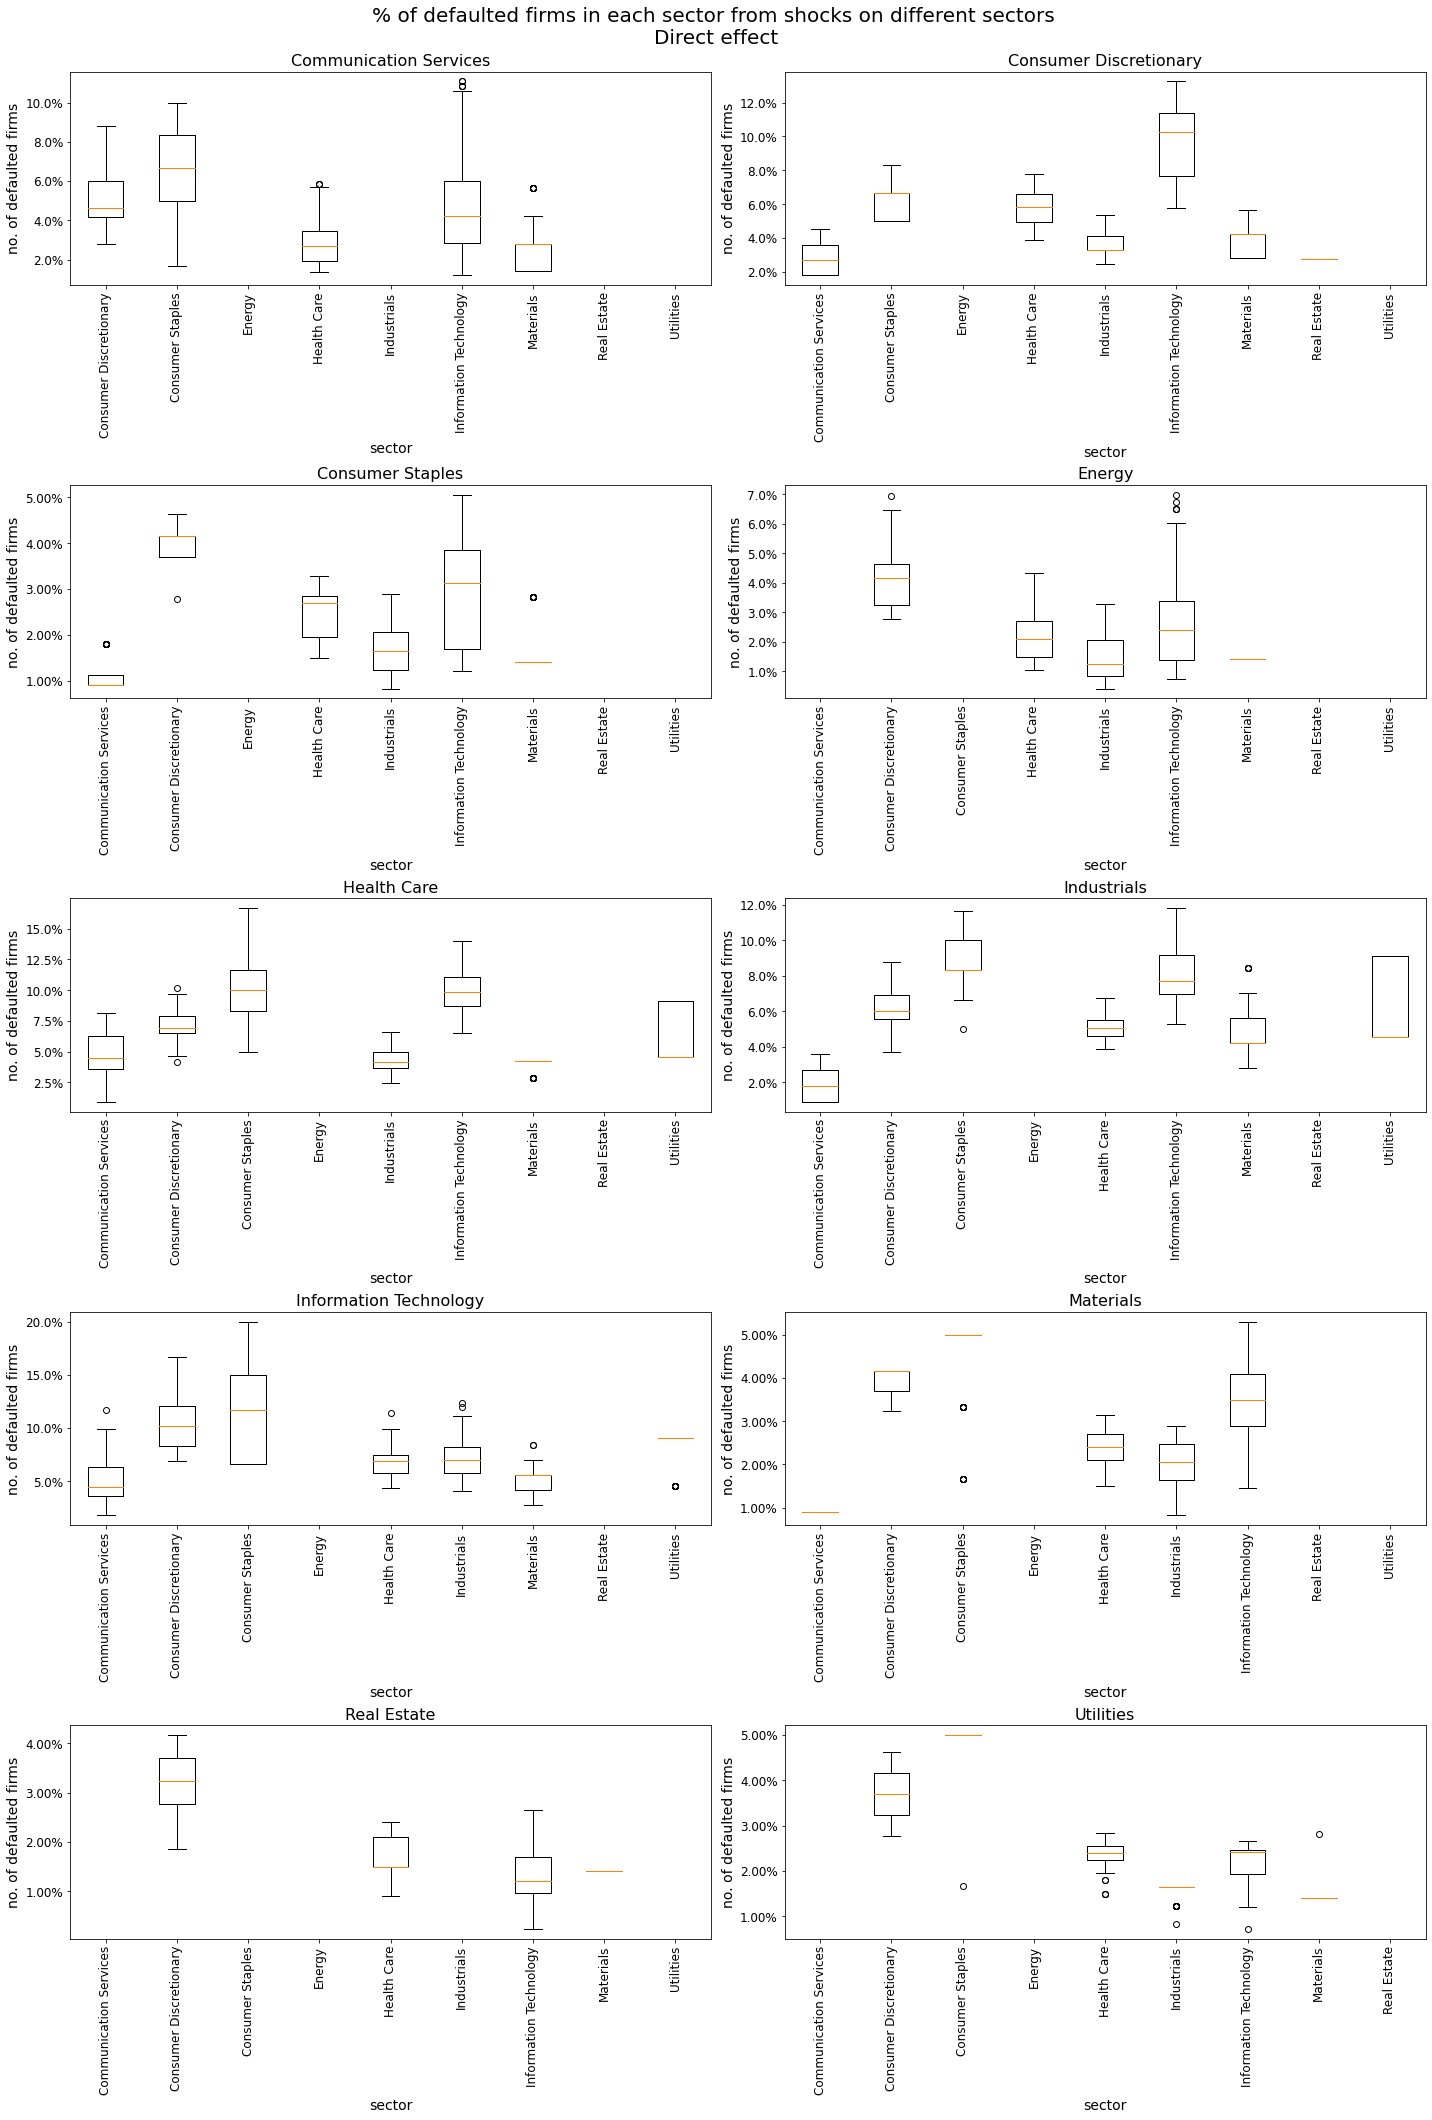

In [7]:
fig = plot_defaults(sectors_dict4, "all", 'sectors_direct')

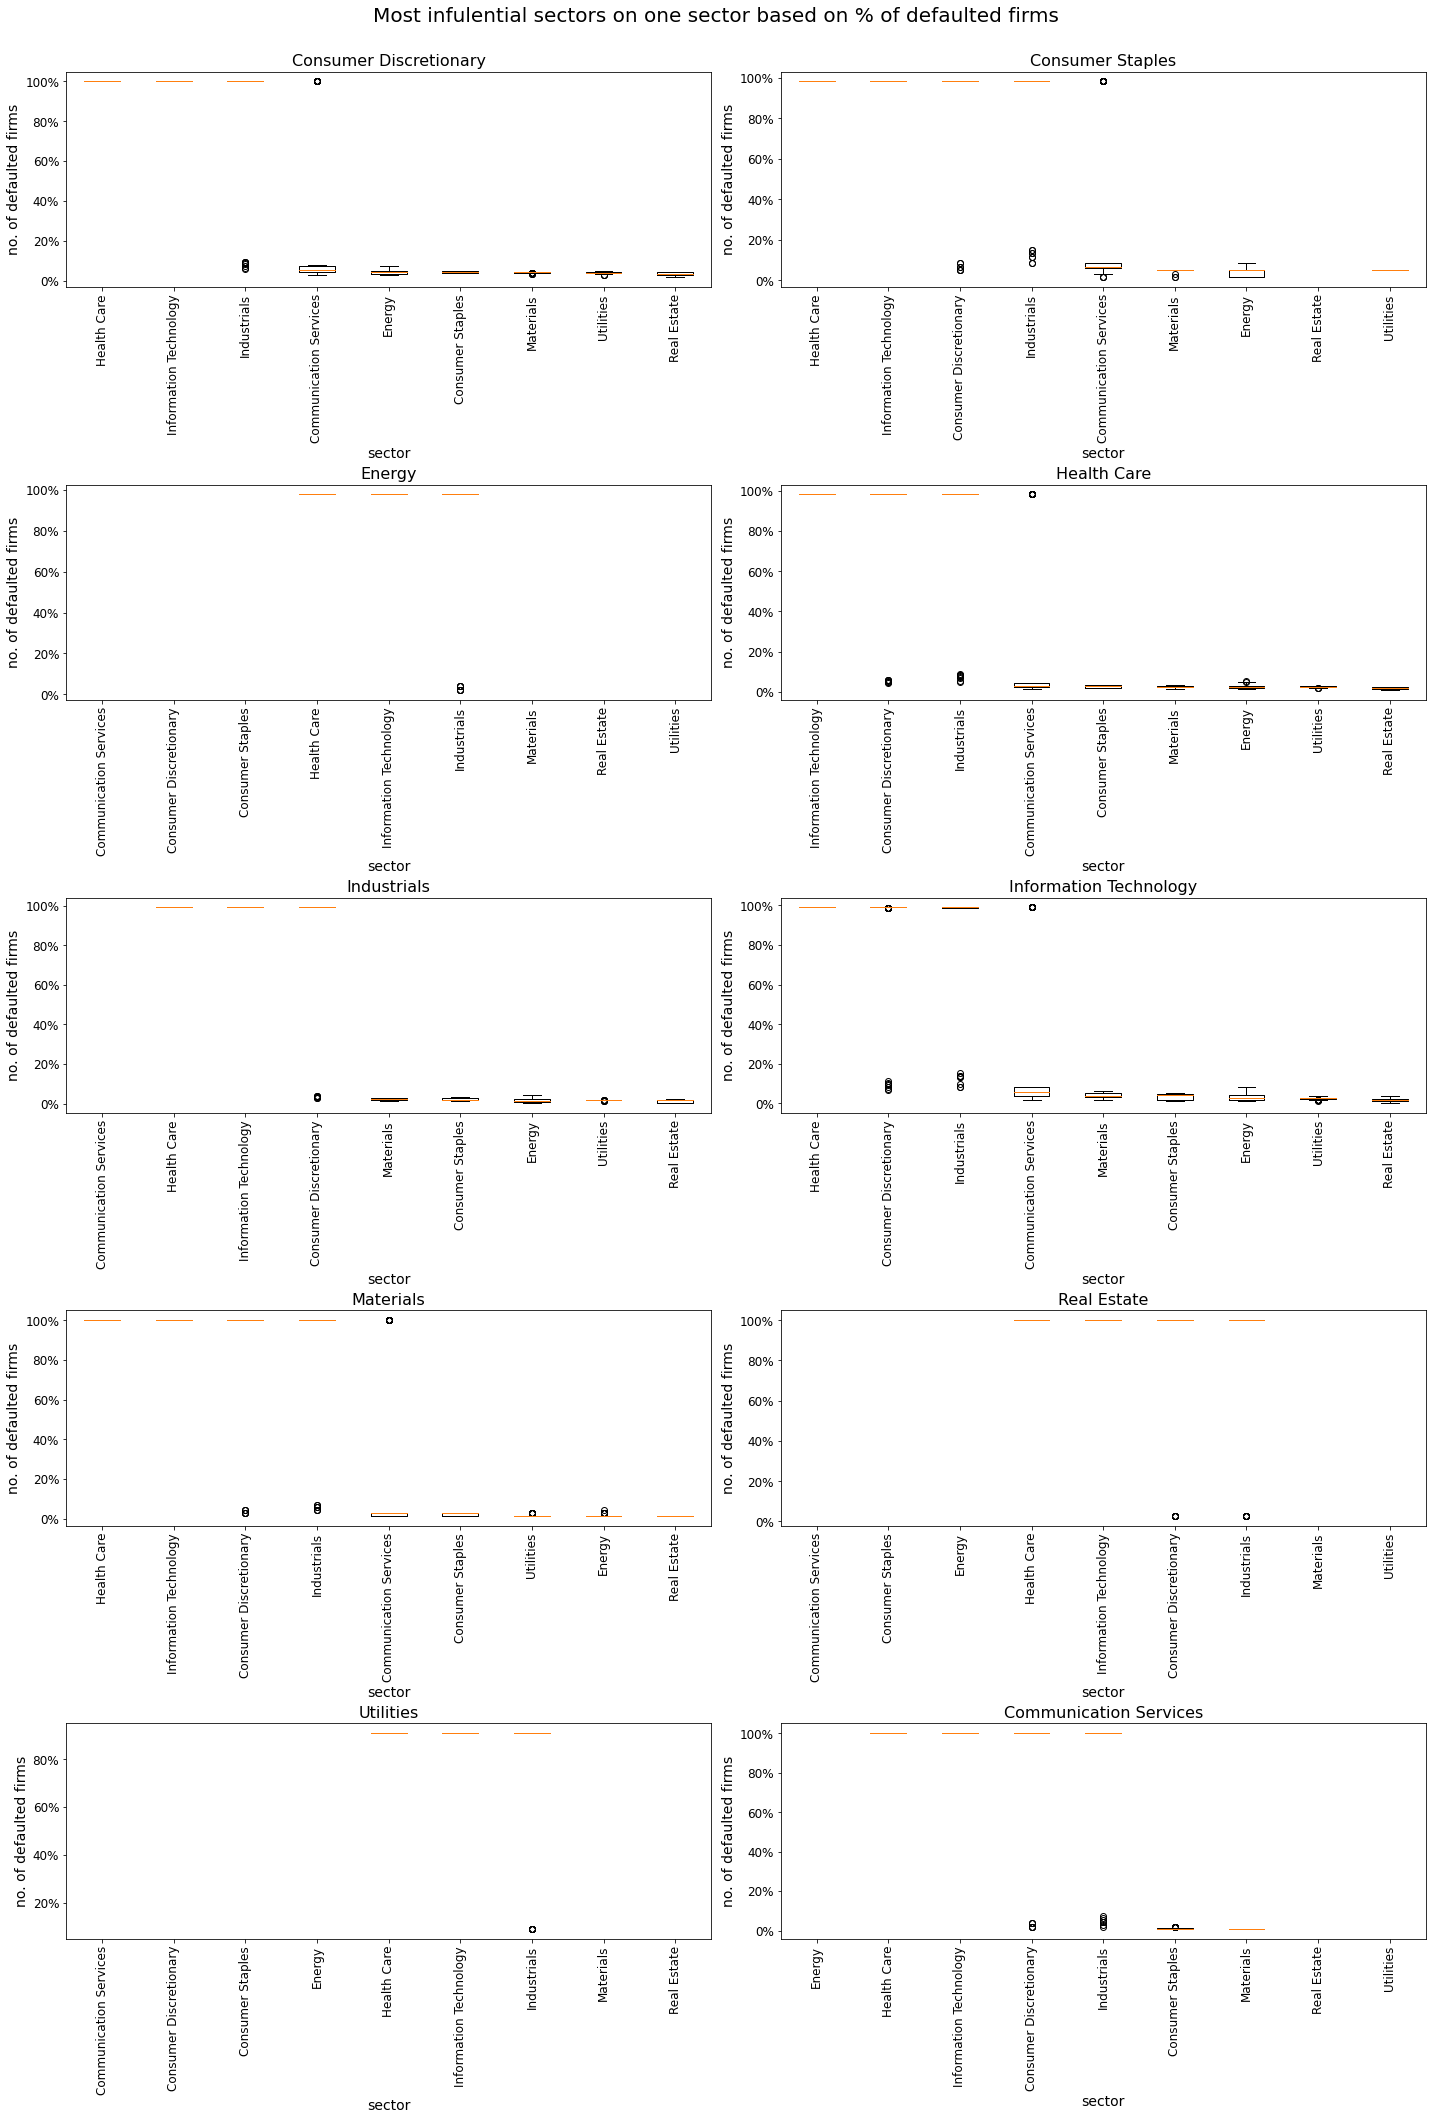

In [8]:
fig = plot_effect_on_sectors_from_other_sectors(sectors_dict4)

## 5th Model
parameters:
- distribution: pareto
- alpha: 1.3
- scale parameter: 0.01
- default threshold: 0.5
- number of simulations: 100

In [15]:
sectors_dict5 = load_simulation_for_all_sectors(config_dict["outputs"]["simulations"], "2022_11_01_153111", config_dict["lists"]["sectors"])

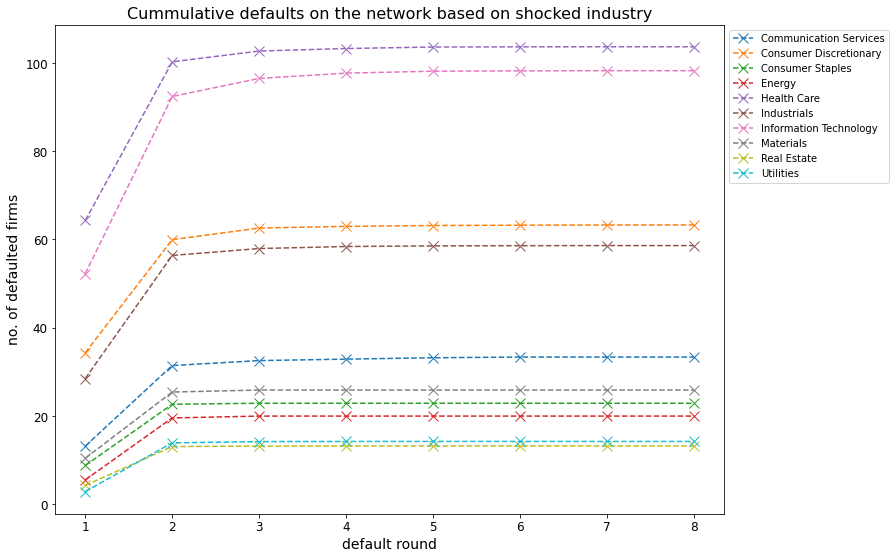

In [16]:
fig = plot_cummulative_defaults(sectors_dict5)

In [10]:
test = sectors_dict3["Information Technology"][50].copy()
test["equity_decrease"] = test.equity / test.equity_orig -1 

In [11]:
test

,ticker,sector,industry,assets,liabilities,equity,label,default_round,equity_orig,equity_decrease
0,AGS,Consumer Discretionary,"Hotels, Restaurants & Leisure",6.283890e+05,6.912400e+05,-6.285099e+04,playags,2.0,4.157100e+04,-2.511895
1,GOOGL,Communication Services,Interactive Media & Services,2.584518e+08,1.076330e+08,1.508188e+08,alphabet,2.0,2.516350e+08,-0.400644
2,AMZN,Consumer Discretionary,Internet & Direct Marketing Retail,3.567579e+08,2.823040e+08,7.445391e+07,amazon,2.0,1.382450e+08,-0.461435
3,ARMK,Consumer Discretionary,"Hotels, Restaurants & Leisure",1.296299e+07,1.165329e+07,1.309694e+06,aramark,3.0,2.722872e+06,-0.519003
4,CSX,Industrials,Road & Rail,3.513170e+07,2.704100e+07,8.090696e+06,csx,2.0,1.349000e+07,-0.400245
...,...,...,...,...,...,...,...,...,...,...
1884,PKTX,Health Care,Biotechnology,-9.577230e+02,9.327000e+01,-1.050983e+03,protokinetix,3.0,3.529700e+02,-3.977542
1885,MCCK,Consumer Discretionary,Household Durables,3.773175e+04,7.805800e+04,-4.032625e+04,mestek,3.0,1.190950e+05,-1.338606
1886,ATRI,Health Care,Health Care Equipment & Supplies,-6.032736e+06,2.296800e+04,-6.055704e+06,atrion,3.0,2.442960e+05,-25.788388
1887,ADEA,Information Technology,Software,1.850405e+06,1.120389e+06,7.300159e+05,adeia,1.0,1.349633e+06,-0.459100
